<a href="https://www.kaggle.com/code/jaimeandrevelasquez/data-analytics-case-study-cyclistic?scriptVersionId=139018657" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Data Analytics Case Study - Cyclistic**


Author: Jaime André Velásquez Moscoso\
Date: 08/05/2023

# *Ask Phase*

## **Scenario**

The director of marketing at Cyclistic, a fictional bike-share company in Chicago, believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my marketing analyst team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, Moreno, the director of marketing, believes that maximizing the number of annual members will be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends.

**Problem:** Annual members are much more profitable than casual riders.\
**Solution:** Maximizing the number of annual members by converting casual riders into members.

Three questions will guide the future marketing program:
1. **How do annual members and casual riders use Cyclistic bikes differently?**
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?\

The director of marketing has assigned us the first question, so that will be the main focus for this case study.

*Theory*: Before analyzing the case, I have the theory that members might use Cyclistic bikes principally for daily activities like commuting or buying basic stuff, while casual riders might use it more for leisure and recreation travels.

### **Business Task/Purpose:**

**The goal of this project is to study Cyclistic’s historical trip data in the last year in order to understand how casual riders and annual members use Cyclistic bikes differently.**
From these insights, the marketing team will identify recommendations for designing strategies to convert casual riders into annual members, which will be presented to the executive team for approval.

Stakeholders: Executive team members, the director of marketing Lily Moreno and the Cyclistic marketing analytics team.

# *Prepare Phase*

### **Data Sources:**

The data sources used for this analysis are Cyclistic’s historical trip data stored in the last 12 months in 12 spreadsheets stored in CSV format, one for each month, covering data from 05-01-2022 to 04-30-2023. 

This is public data that has been provided by Motivate International Inc., which records real, original bike-share data in the city of Chicago; so the data is objective, unbiased and credible. The data sources are also comprehensive, accurate and relevant to solve our business problem because they include all the rides that have been taken by customer type, including date and time to calculate ride length and analyze trends based on day of week, month and season.

To evaluate the data’s credibility and integrity in detail, we can assess the most important data aspects:
- Reliable: The data is reliable because it’s provided by Motivate International Inc., a trustworthy source that collects real historical bike-share trip data.
- Original: The data is original because it’s real historical trip data from real riders that used the bicycle sharing service in the city of Chicago.
- Comprehensive: The data is comprehensive because it includes all the rides taken in an entire year by customer type, bike type, date, time and station names.
- Current: The data is current because it’s from last month and taken for the entire previous year from May 2022 to April 2023.
- Cited: The data is cited because we know it’s from Divvy bicycle sharing service, operated by Lyft Bikes and Scooters, LLC (“Bikeshare”) and made available by Motivate International Inc.

It’s important to address the data-privacy issues present in the license under which the data has been available to the public, which is based on Chicago’s regulatory data privacy policy; so, it’s not allowed to use riders’ personally identifiable information like their credit card information.

These spreadsheets are organized in a wide format, where each row represents one specific ride and the columns contain different attributes of the ride, which include the ride ID, the type of the bike, timestamps, the name of the stations in which the ride departed and arrived, coordinates for latitudes and longitudes and the type of customer.

### Loading packages needed for the analysis
Installing and loading the R packages and loading the libraries needed for our analysis.

In [1]:
#Loading the packages
library(tidyverse)
library(janitor)
library(lubridate)
library(skimr)
library(ggplot2)
library(dplyr)
library(tidyr)
library(scales)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




### Reading all the files for all the months of the year from May 1st, 2022 through April 30th, 2023
Creating 12 data frames while importing CSV files into R, with names 202205 for May 2022, 202206 for June 2022, up until cyclistic_202304 for April 2023:

In [2]:
#Loading our Data
cyclistic_202205 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202205-divvy-tripdata.csv")
cyclistic_202206 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202206-divvy-tripdata.csv")
cyclistic_202207 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202207-divvy-tripdata.csv")
cyclistic_202208 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202208-divvy-tripdata.csv")
cyclistic_202209 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202209-divvy-publictripdata.csv")
cyclistic_202210 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202210-divvy-tripdata.csv")
cyclistic_202211 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202211-divvy-tripdata.csv")
cyclistic_202212 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202212-divvy-tripdata.csv")
cyclistic_202301 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202301-divvy-tripdata.csv")
cyclistic_202302 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202302-divvy-tripdata.csv")
cyclistic_202303 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202303-divvy-tripdata.csv")
cyclistic_202304 <- read.csv("/kaggle/input/cyclistic-bike-share-may-2022-though-april-2023/202304-divvy-tripdata.csv")

### Checking the structure of the data frames
We want to check the structure of the data frames. To unite the data the column names and their values types must be the same. 

In [3]:
#Inspecting the data frames
str(cyclistic_202205)
str(cyclistic_202206)
str(cyclistic_202207)
str(cyclistic_202208)
str(cyclistic_202209)
str(cyclistic_202210)
str(cyclistic_202211)
str(cyclistic_202212)
str(cyclistic_202301)
str(cyclistic_202302)
str(cyclistic_202303)
str(cyclistic_202304)

'data.frame':	634858 obs. of  13 variables:
 $ ride_id           : chr  "EC2DE40644C6B0F4" "1C31AD03897EE385" "1542FBEC830415CF" "6FF59852924528F8" ...
 $ rideable_type     : chr  "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-05-23 23:06:58" "2022-05-11 08:53:28" "2022-05-26 18:36:28" "2022-05-10 07:30:07" ...
 $ ended_at          : chr  "2022-05-23 23:40:19" "2022-05-11 09:31:22" "2022-05-26 18:58:18" "2022-05-10 07:38:49" ...
 $ start_station_name: chr  "Wabash Ave & Grand Ave" "DuSable Lake Shore Dr & Monroe St" "Clinton St & Madison St" "Clinton St & Madison St" ...
 $ start_station_id  : chr  "TA1307000117" "13300" "TA1305000032" "TA1305000032" ...
 $ end_station_name  : chr  "Halsted St & Roscoe St" "Field Blvd & South Water St" "Wood St & Milwaukee Ave" "Clark St & Randolph St" ...
 $ end_station_id    : chr  "TA1309000025" "15534" "13221" "TA1305000030" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng 

We can see that all the data frames have the same column names and types, so we can unite the data frames. We're going to change the data types after we combine the data frames.

### Combining the Data Frames
Creating a new data frame all_trips to combine all the previous data frames into a single one:

In [4]:
#Unite the data frames
all_trips <- bind_rows(cyclistic_202205, cyclistic_202206, cyclistic_202207, cyclistic_202208, cyclistic_202209, cyclistic_202210, cyclistic_202211, cyclistic_202212, cyclistic_202301, cyclistic_202302, cyclistic_202303, cyclistic_202304)

We saw before that the column names were already snake_case, but we want to make sure there aren't any spaces that could cause errors, so we're going to trim those spaces: 

In [5]:
#Cleaning the column names
all_trips <- clean_names(all_trips)

Inspecting our data frame:

In [6]:
#Inspecting our data frame
str(all_trips)
summary(all_trips)
table(all_trips$member_casual)

'data.frame':	5859061 obs. of  13 variables:
 $ ride_id           : chr  "EC2DE40644C6B0F4" "1C31AD03897EE385" "1542FBEC830415CF" "6FF59852924528F8" ...
 $ rideable_type     : chr  "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : chr  "2022-05-23 23:06:58" "2022-05-11 08:53:28" "2022-05-26 18:36:28" "2022-05-10 07:30:07" ...
 $ ended_at          : chr  "2022-05-23 23:40:19" "2022-05-11 09:31:22" "2022-05-26 18:58:18" "2022-05-10 07:38:49" ...
 $ start_station_name: chr  "Wabash Ave & Grand Ave" "DuSable Lake Shore Dr & Monroe St" "Clinton St & Madison St" "Clinton St & Madison St" ...
 $ start_station_id  : chr  "TA1307000117" "13300" "TA1305000032" "TA1305000032" ...
 $ end_station_name  : chr  "Halsted St & Roscoe St" "Field Blvd & South Water St" "Wood St & Milwaukee Ave" "Clark St & Randolph St" ...
 $ end_station_id    : chr  "TA1309000025" "15534" "13221" "TA1305000030" ...
 $ start_lat         : num  41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng

   ride_id          rideable_type       started_at          ended_at        
 Length:5859061     Length:5859061     Length:5859061     Length:5859061    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 start_station_name start_station_id   end_station_name   end_station_id    
 Length:5859061     Length:5859061     Length:5859061     Length:5859061    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            


 casual  member 
2358307 3500754 

# *Process Phase*
### Checking for duplicated data
We want to know if there are any duplicated rows in our data frame:



In [7]:
#Checking for duplicated data
sum(duplicated(all_trips))

[1] 0

- There are no duplicated rows in our data.

### Removing Empty Rows
Removing rows that are totally empty.

In [8]:
#Removing totally empty rows
remove_empty(all_trips, which = "rows", cutoff = 1, quiet=TRUE)

#Alternatively
all_trips <- all_trips[rowSums(is.na(all_trips)) < ncol(all_trips), ]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,EC2DE40644C6B0F4,classic_bike,2022-05-23 23:06:58,2022-05-23 23:40:19,Wabash Ave & Grand Ave,TA1307000117,Halsted St & Roscoe St,TA1309000025,41.89147,-87.62676,41.94367,-87.64895,member
2,1C31AD03897EE385,classic_bike,2022-05-11 08:53:28,2022-05-11 09:31:22,DuSable Lake Shore Dr & Monroe St,13300,Field Blvd & South Water St,15534,41.88096,-87.61674,41.88635,-87.61752,member
3,1542FBEC830415CF,classic_bike,2022-05-26 18:36:28,2022-05-26 18:58:18,Clinton St & Madison St,TA1305000032,Wood St & Milwaukee Ave,13221,41.88224,-87.64107,41.90765,-87.67255,member
4,6FF59852924528F8,classic_bike,2022-05-10 07:30:07,2022-05-10 07:38:49,Clinton St & Madison St,TA1305000032,Clark St & Randolph St,TA1305000030,41.88224,-87.64107,41.88458,-87.63189,member
5,483C52CAAE12E3AC,classic_bike,2022-05-10 17:31:56,2022-05-10 17:36:57,Clinton St & Madison St,TA1305000032,Morgan St & Lake St,TA1306000015,41.88224,-87.64107,41.88578,-87.65102,member
6,C0A3AA5A614DCE01,classic_bike,2022-05-04 14:48:55,2022-05-04 14:56:04,Carpenter St & Huron St,13196,Sangamon St & Washington Blvd,13409,41.89456,-87.65345,41.88316,-87.65110,member
7,F2AF43A242DF4555,classic_bike,2022-05-27 12:41:48,2022-05-27 12:50:41,Noble St & Milwaukee Ave,13290,Wood St & Augusta Blvd,657,41.90068,-87.66260,41.89918,-87.67220,member
8,377BE1F5F0E399CA,docked_bike,2022-05-29 19:19:24,2022-05-29 19:31:34,Halsted St & Wrightwood Ave,TA1309000061,Southport Ave & Clybourn Ave,TA1309000030,41.92914,-87.64908,41.92077,-87.66371,casual
9,B136E0C969773F59,classic_bike,2022-05-16 17:48:44,2022-05-16 18:05:26,Clinton St & Madison St,TA1305000032,Clybourn Ave & Division St,TA1307000115,41.88224,-87.64107,41.90461,-87.64055,member


### Trimming the data 
We want to make sure that the value fields of the columns ride_id, rideable_type, member_casual, start_station_name and end_station_name don't contain any leading or trailing spaces by trimming the rows.

In [9]:
#Trimming the data rows
all_trips <- all_trips %>%
  mutate(rideable_type = trimws(rideable_type),
         member_casual = trimws(member_casual),
         ride_id = trimws(ride_id),
         start_station_name = trimws(start_station_name),
         end_station_name = trimws(end_station_name))

#Checking some of the distinct values of the columns
print(unique(all_trips$rideable_type))
print(unique(all_trips$member_casual))

[1] "classic_bike"  "docked_bike"   "electric_bike"
[1] "member" "casual"


### Adding New Columns 
Adding columns date, month, date, year and day_of_week to get the date as yyyy-mm-dd, month and day as number, year as full year, starting_hour and ending_hour to get the hour part of each ride:

In [10]:
#Adding new columns
all_trips$date <- as.Date(all_trips$started_at)
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")
all_trips$starting_hour <- format(as.POSIXct(all_trips$started_at), '%H')
all_trips$ending_hour <- format(as.POSIXct(all_trips$ended_at), '%H')

Adding column ride_length in seconds:

In [11]:
#Adding ride_length
all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

Changing ride_length format from factor to numeric:

In [12]:
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))

### Removing data with mistakes
Now we're going to remove data rows where the start_station_name was “HQ QR” or the ride_length was less or equal to 0 because these include bikes that were taken out of circulation for quality control and inspection, and ride length less or equal to 0 is attributable to system errors because the start time can't be greater than the end time of a ride. \
Now, after more investigation of the data, I've decided to also remove all the data rows with ride length less than 10 seconds. Even though many stations are very close to each other, it's very unlikely that they take less than 10 seconds even for the fastest riders, since they start at a speed of 0, and for the rides where users just return to the same station it wouldn't make any sense to just ride for less than 10 seconds, since they would not have done anything in such a short time. These rides are very likely to be caused by system errors, test rides, or false starts when the riders changed their mind and didn't actually use the bikes. However, data from 10 seconds and greater will be kept to account for possible cases where cyclists are very fast or they just wanted to ride for leisure a very short amount of time, since it's very important to explore further these feasible cases.

In [13]:
#Removing data with mistakes and quality assurance issues
all_trips <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<10),]

#Alternative way for removing only rows where the start time can't be greater than the end time of a ride (here the count is 0 because we already removed these rows)
count <- sum(all_trips$started_at > all_trips$ended_at)
print(count)
all_trips <- all_trips[!(all_trips$started_at > all_trips$ended_at), ]

[1] 0


### Ordering and adding
Ordering the day_of_week column so it starts on Sunday and is sorted correctly until Saturday:

In [14]:
#Ordering the days of the week
all_trips$day_of_week <- ordered(all_trips$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

 Adding weekday column that has the first three characters of every day of the week.


In [15]:
#Adding weekday column
all_trips$weekday <- wday(all_trips$started_at, label = TRUE)

### Exporting our cleaned data frame
This is useful to be able to use our cleaned data in other tools like Tableau or Power BI.

In [16]:
write.csv(all_trips, file = 'Cyclistic_CleanedUnion.csv')

### **Data Cleaning Documentation**
### **Change Log**

*Version 7.0.0 (07-27-2023)*

**New**

- The R program was selected for its high functionality at cleaning data. Created 12 data frames while importing CSV files into R, with names cyclistic_202205 for May 2022, cyclistic_202206 for June 2022, up until cyclistic_202304 for April 2023.
- Created a new data frame all_trips to combine all the previous data frames into a single one.
- Added columns date, month, date, year and day_of_week to get the date as yyyy-mm-dd, month and day as number, and year as full year of each ride.
- Added columns starting_hour and ending_hour to get the hour part of each ride.
- Added column ride_length in seconds.
- Added column weekday with the first three characters of every day of the week.

**Changes**

- Changed ride_length format from factor to numeric.
- Ordered the day_of_week column so it starts on Sunday = 1 and is sorted in ascending order until Saturday = 7.

**Removed**

- Removed data rows that are totally empty.
- Removed data rows where the start_station_name was “HQ QR” or the ride_length was negative because these include bikes that were taken out of circulation for quality control and inspection.
- Removed data rows where the ride_length was less than 10 seconds since this is not possible.

After these steps it's confirmed that the data is integral, clean and ready to analyze.

# *Analyze and Share Phases*
### **Analyzing and Visualizing Data**
### Examining the Lengths of the Rides and the Number of Rides
First we're going to calculate and examine some statistics of the column ride_length:

In [17]:
#Examining general statistical data for the length of the rides
mean(all_trips$ride_length)
mean(all_trips$ride_length/60)
median(all_trips$ride_length)
max(all_trips$ride_length)
max(all_trips$ride_length/3600)
max(all_trips$ride_length/86400)
summary(all_trips$ride_length)


[1] 1142.238

[1] 19.03729

[1] 603

[1] 2483235

[1] 689.7875

[1] 28.74115

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     10     343     603    1142    1079 2483235 

- The average ride length of bike trips is 1142 seconds or 19 minutes.
- The median ride length of bike trips is 603 seconds, which means that half of the bike trips have a duration less than or equal to 603 seconds.
- The maximum length for a ride is 2483235 seconds, which is 689 hours or 28 days.



### Analyzing data by Customer Type
Now we're going to aggregate data based on customer type to find insights about how members and casual customers use Cyclistic bikes differently:

In [18]:
#Ride length by customer type
aggregate(all_trips$ride_length ~ all_trips$member_casual, FUN = mean)
aggregate(all_trips$ride_length ~ all_trips$member_casual, FUN = median)
aggregate(all_trips$ride_length ~ all_trips$member_casual, FUN = max)


all_trips$member_casual,all_trips$ride_length
<chr>,<dbl>
casual,1717.1304
member,754.3859


all_trips$member_casual,all_trips$ride_length
<chr>,<dbl>
casual,754
member,523


all_trips$member_casual,all_trips$ride_length
<chr>,<dbl>
casual,2483235
member,93580


- The average ride length for casual riders is 1717 seconds, while for members it's 754 seconds. This gives us a first clue on how Cyclistic's clients use the bikes differently. Casual riders take much longer rides than members on average.
- We can also see that half of the casual rider trips have a duration of less than or equal to 754 seconds, while the median for member trips is 523 seconds. The pattern is still present, but some much longer bike trips for each type of customer have impacted the average, like when we see the highest values being 2483235 seconds for casual users and 93580 for members. 

For this case study, when analyzing the duration of the rides we'll be focusing mainly on the average ride length. This is because, by examining the average ride length, we can gain insights into the typical duration of rides for different customer types during specific time periods to spot trends and patterns in ride behavior. Understanding these patterns will be valuable in designing targeted marketing strategies and optimizing operational decisions. 

Let's find out the number of rides taken by each type of user so we can understand their behaviors better:

In [19]:
#Number of rides by customer type
print(table(all_trips$member_casual))
ride_counts <- table(all_trips$member_casual)
ride_percentages <- prop.table(ride_counts) * 100
print(ride_percentages)


 casual  member 
2347990 3480306 

  casual   member 
40.28605 59.71395 


- During this year period, Cyclistic members have taken 3480306 rides, which represents the 59.71% of all the rides, while casual riders have taken 2347990 rides, which accounts for 40.29%. We can see that members take more rides in general than casual users.

Now we're going to plot a pie chart for the total number of rides:

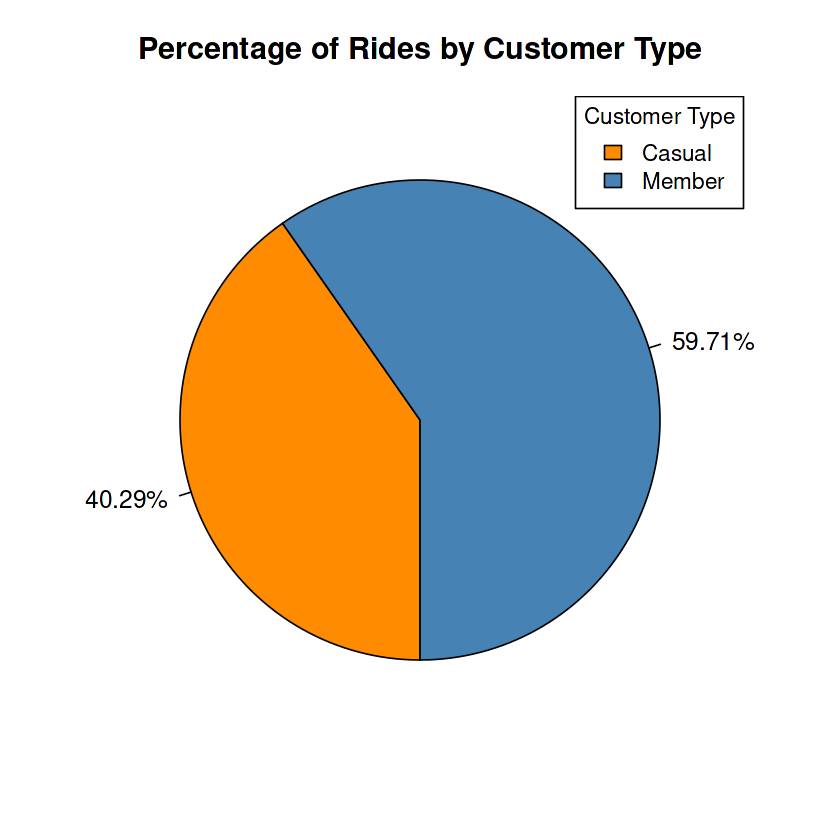

In [20]:
#Creating a pie chart for the number of rides
par(pty = "s", mai = c(0.8, 0.8, 0.8, 0.8))
ride_percentages_rounded <- round(ride_percentages, 2)
colors <- c("darkorange", "steelblue")
pie(ride_percentages_rounded, labels = paste0(ride_percentages_rounded, "%"), col = colors,
    clockwise = TRUE, init.angle = 270, cex = 1.2)  
legend("topright", legend = c("Casual", "Member"), fill = colors, title = "Customer Type", cex = 1.1)  # Adjust the cex value as desired (e.g., 1.1)
title(main = "Percentage of Rides by Customer Type", cex.main = 1.5)

After analyzing more the data, we found out that a comparison for weekdays (from Monday to Friday) and for Weekends (Saturday and Friday), along with customer type is very useful for this case study. So we're going to plot the same pie chart but separated for weekdays and weekends.

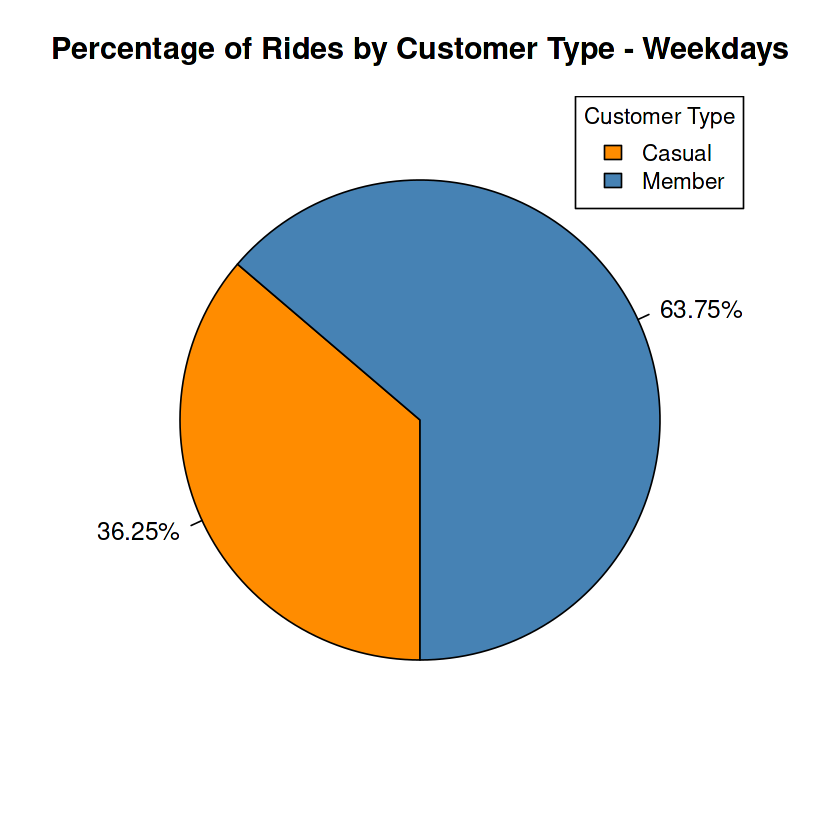

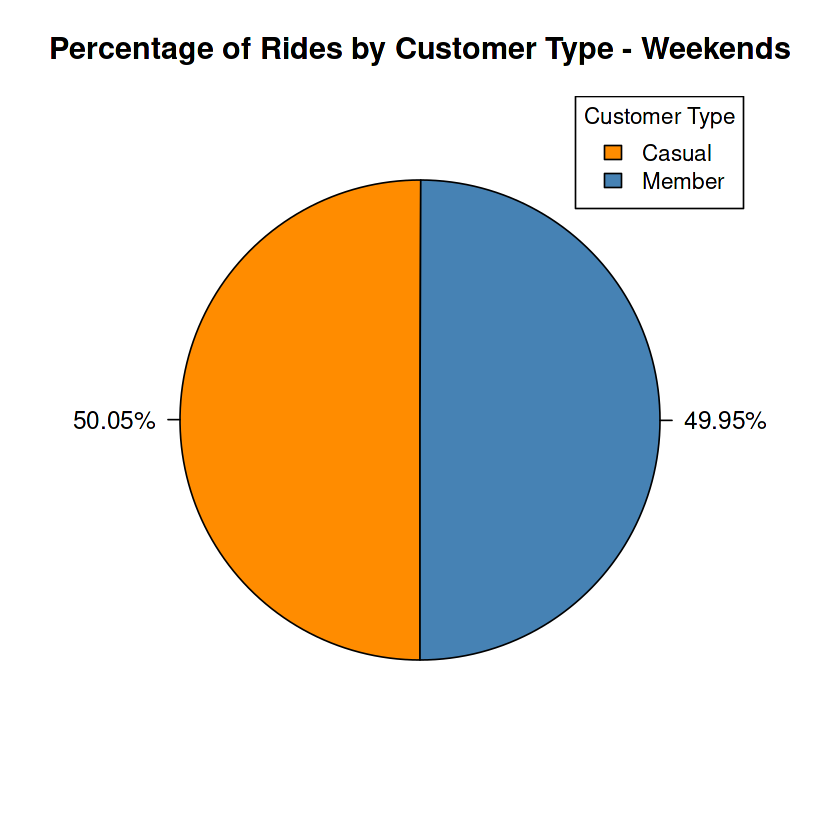

In [21]:
#Pie chart for number of rides by customer type for the Weekdays
par(pty = "s", mai = c(0.8, 0.8, 0.8, 0.8))
all_trips$count <- 1
weekday_trips <- all_trips[all_trips$weekday %in% c("Mon", "Tue", "Wed", "Thu", "Fri"), ]
weekday_percentages <- weekday_trips %>%
  group_by(member_casual) %>%
  summarise(total_rides = sum(count)) %>%
  mutate(percentage = round((total_rides / sum(total_rides)) * 100, 2))
colors_weekdays <- c("darkorange", "steelblue")
pie(weekday_percentages$percentage, labels = paste0(weekday_percentages$percentage, "%"), col = colors_weekdays,
    clockwise = TRUE, init.angle = 270, cex = 1.2) 
legend("topright", legend = c("Casual", "Member"), fill = colors_weekdays, title = "Customer Type", cex = 1.1)
title(main = "Percentage of Rides by Customer Type - Weekdays", cex.main = 1.5)

#Pie chart for number of rides by customer type for the Weekends
all_trips$count <- 1
weekend_trips <- all_trips[all_trips$weekday %in% c("Sat", "Sun"), ]
weekend_percentages <- weekend_trips %>%
  group_by(member_casual) %>%
  summarise(total_rides = sum(count)) %>%
  mutate(percentage = round((total_rides / sum(total_rides)) * 100, 2))
colors_weekends <- c("darkorange", "steelblue")
par(pty = "s", mai = c(0.8, 0.8, 0.8, 0.8))
pie(weekend_percentages$percentage, labels = paste0(weekend_percentages$percentage, "%"), col = colors_weekends,
    clockwise = TRUE, init.angle = 270, cex = 1.2)  
legend("topright", legend = c("Casual", "Member"), fill = colors_weekends, title = "Customer Type", cex = 1.1) 
title(main = "Percentage of Rides by Customer Type - Weekends", cex.main = 1.5)

- On weekdays, members take 63.75% of all rides, while casual users only take 36.25% of all Cyclistic rides in the Chicago area.
- However, on weekends, the number of rides taken by members and casual riders is almost the same, with casual users taking only slightly higher number of rides (50.05%).

From this overall perpective we can draw some initial general insights:
- Members are the primary user group of Cyclistic bikes, accounting for the majority (59.71%) of all rides during the analyzed period. This indicates a strong level of engagement and loyalty among the Cyclistic members.
- The fact that on weekdays, members take a significantly higher proportion of all rides compared to casual users suggests that members may primarily use Cyclistic bikes for commuting or regular transportation purposes.
- The fact that on weekends there is a more balanced distribution of rides between members and casual users, indicates that  both types of customers might change their purposes for bike use on these days, probably for leisure or recreational activities.

### Analyzing Rides by Customer Type and Day of Week
Now we're going to analyze our customer type by day of week. First let's get an overview of the average length of the rides and number of rides by day of week:

In [22]:
#Average Ride length by customer type and day of week
aggregate(all_trips$ride_length ~ all_trips$member_casual + all_trips$day_of_week, FUN = mean)

#Number of rides and average duration by customer type and day of week
all_trips %>%
  group_by(member_casual, weekday) %>% 
  summarize(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)

all_trips$member_casual,all_trips$day_of_week,all_trips$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,2015.0985
member,Sunday,834.3624
casual,Monday,1709.4905
member,Monday,722.8798
casual,Tuesday,1527.1519
member,Tuesday,721.1564
casual,Wednesday,1456.5484
member,Wednesday,717.4386
casual,Thursday,1488.3709


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,387104,2015.0985
casual,Mon,274553,1709.4905
casual,Tue,271394,1527.1519
casual,Wed,283366,1456.5484
casual,Thu,317098,1488.3709
casual,Fri,348542,1658.3770
casual,Sat,465933,1942.8477
member,Sun,399673,834.3624
member,Mon,481731,722.8798


- The pattern observed earlier seems to repeat for all the days of the week.

To see the trends better, we're going to create visualizations. A column chart is suitable to visualize trends about the quantity and length of rides that both types of customers take by day of week because it effectively showcases the distribution and comparison of ride counts and lengths between casual and member customers on each day. We'll also be plotting a general chart for the total number of rides by day of week to understand what days of the week are more popular in general.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


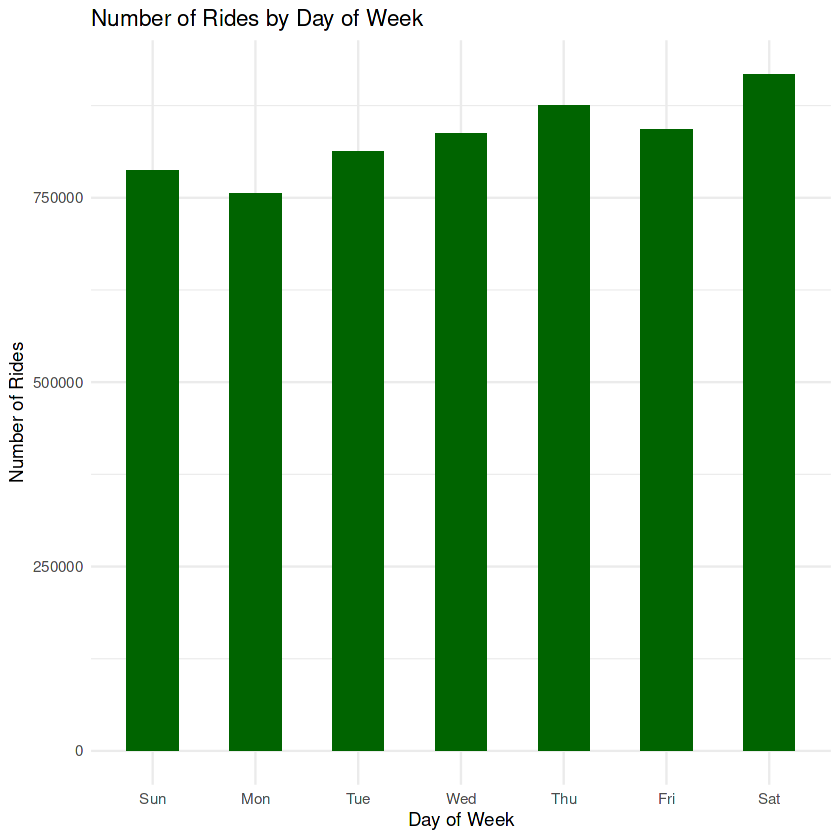

Saving 12.5 x 6.67 in image


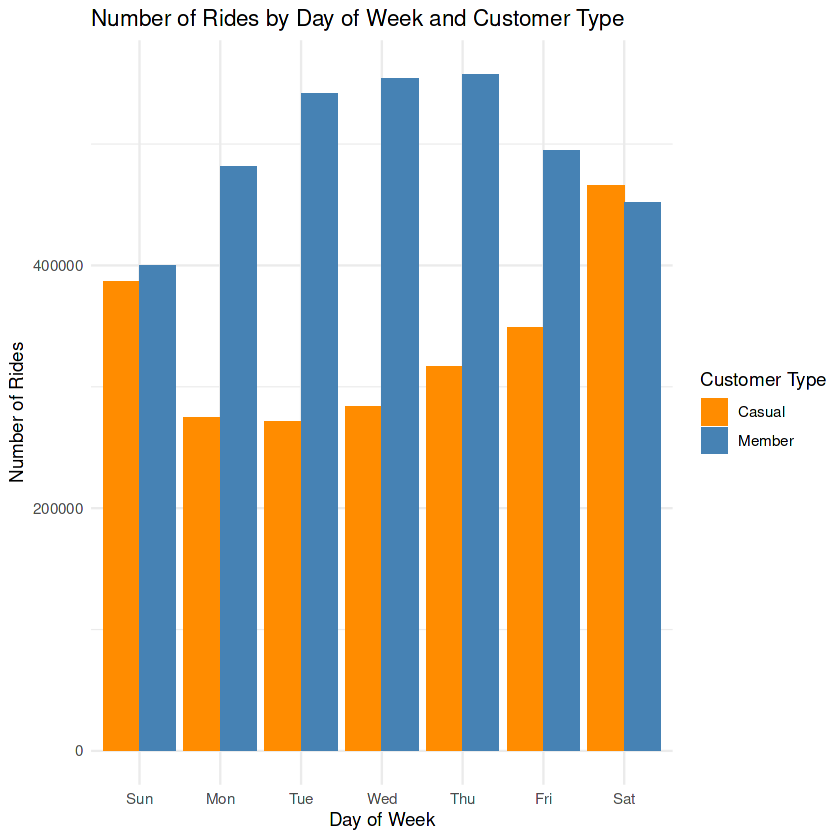

In [23]:
#Plotting the total Number of Rides by Day of Week
options(scipen = 999)
all_trips %>%
  group_by(weekday) %>%
  summarise(number_of_rides = n()) %>%
  ggplot(aes(x = factor(weekday, levels = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat")), y = number_of_rides)) +
  geom_col(fill = "darkgreen", width = 0.5) +
  labs(title = "Number of Rides by Day of Week",
       x = "Day of Week",
       y = "Number of Rides") +
  theme_minimal()

#Plotting the Number of Rides by Day of Week and Customer Type
options(scipen = 999)
all_trips %>%
  group_by(member_casual, weekday) %>%
  summarise(number_of_rides = n()) %>%
  arrange(member_casual, weekday) %>%
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Number of Rides by Day of Week and Customer Type",
       x = "Day of Week",
       y = "Number of Rides") +
  scale_fill_manual(values = c("darkorange", "steelblue"),
                    labels = c("Casual", "Member"),
                    name = "Customer Type") +
  theme_minimal()
ggsave('Number of Rides by Day of Week and Customer Type.png')




- On Saturdays and Thursdays, users take more bike rides in general, while they take fewer rides on Mondays and Sundays.
- Members take much more rides than casual customers on weekdays, but the number of rides stabilizes on weekends, in which the difference is minimal.
- Members take more rides overall compared to casual members, with the exception of Saturdays.
- Members take more rides on mid-weekdays Tuesdays, Wednesdays and Thursdays and fewer rides on weekends.
- Casual riders take more rides on weekends and fewer rides on weekdays, where Thursdays and Fridays 
- Casual riders take more rides on Saturdays than on Sundays, and they also take more rides on Thursdays and Fridays compared to the other weekdays.
- Both types of customers take more rides on Saturdays than on Sundays.

Now we're going to plot a similar bar graph for the average duration of the rides. We'll also plot a general graph to understand the global pattern.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


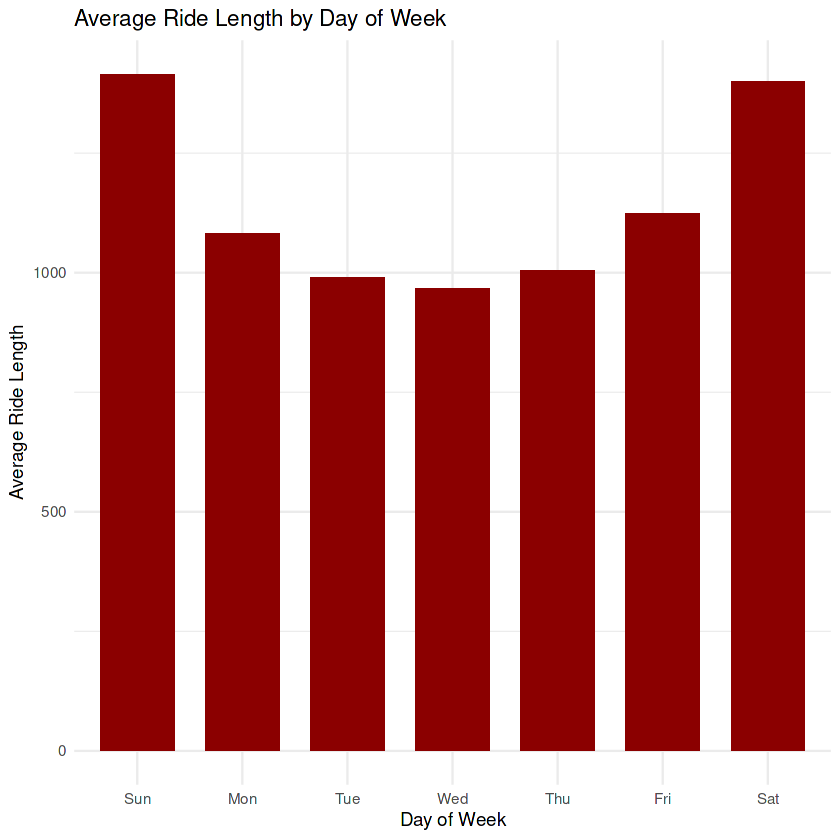

Saving 12.5 x 6.67 in image


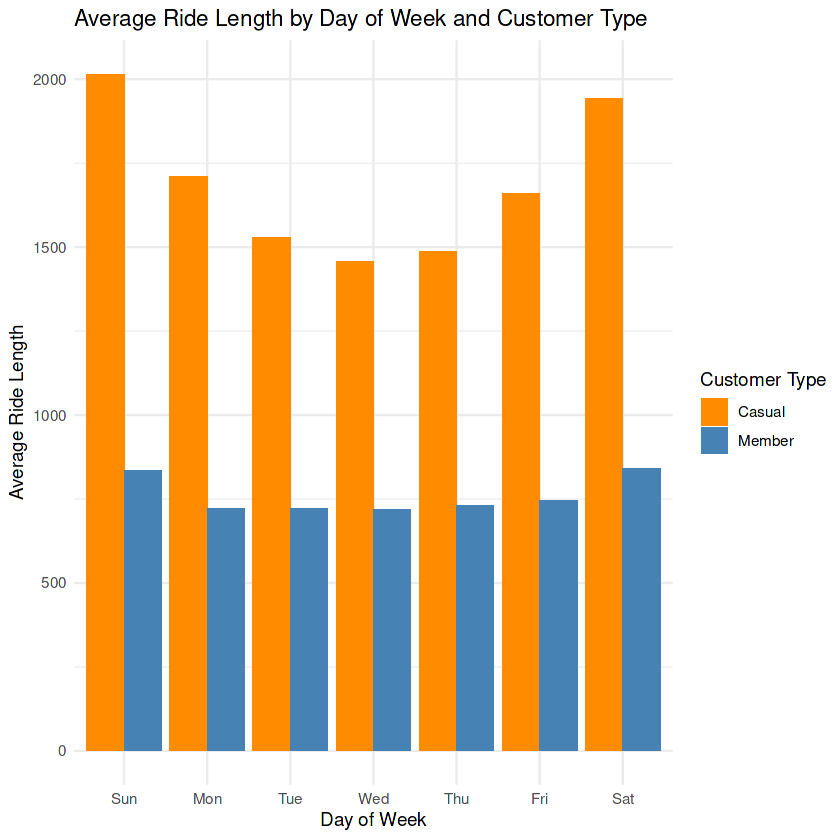

In [24]:
#Plotting the Average Ride Length by Day of Week
options(scipen = 999)
all_trips %>%
  group_by(weekday) %>%
  summarise(average_duration = mean(ride_length)) %>%
  arrange(weekday) %>%
  ggplot(aes(x = factor(weekday, levels = c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat")), y = average_duration)) +
  geom_col(fill = "darkred", width = 0.7) +
  labs(title = "Average Ride Length by Day of Week",
       x = "Day of Week",
       y = "Average Ride Length") +
  theme_minimal()

#Plotting the Average Ride Length by Day of Week and Customer Type
options(scipen = 999)
all_trips %>%
  group_by(member_casual, weekday) %>%
  summarise(average_duration = mean(ride_length)) %>%
  arrange(member_casual, weekday) %>%
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge") +
  labs(title = "Average Ride Length by Day of Week and Customer Type",
       x = "Day of Week",
       y = "Average Ride Length") +
  scale_fill_manual(values = c("darkorange", "steelblue"),
                    labels = c("Casual", "Member"),
                    name = "Customer Type") +
  theme_minimal()
ggsave('Average Ride Length by Day of Week and Customer Type.png')



- In general, longer rides take place on weekends.
- The average ride length for casual customers is much longer than members for all days of the week.
- Rides are longer for both types of customers on the weekends. 
- For casual customers, the average ride length is somewhat higher on Mondays and Fridays than the rest of the weekdays, while for members it’s the same but much steadier overall.
- Casual members take somewhat longer rides on Sundays than on Saturdays, while members take somewhat longer rides on Saturdays.
- Both types of customers take shorter rides on Wednesdays.

From the analyses of these two plots we can get more connected and conclusive insights:
- Members consistently take more rides than casual riders throughout the week, indicating higher engagement and reliance on the bike-share service.
- Members show higher ride frequency on weekdays compared to casual riders. This suggests that annual members predominantly use the bikes for commuting or regular transportation purposes. However, the difference in ride frequency between the two segments becomes minimal on weekends, indicating a shift towards more leisure-oriented usage.
- Casual riders exhibit a higher preference for weekend bike rides, suggesting that they utilize the service more for recreational activities and leisurely outings.
- Members demonstrate higher ride frequency on mid-weekdays (Tuesdays, Wednesdays, and Thursdays) compared to casual riders. This pattern implies that annual members are more likely to use the bikes for consistent transportation needs throughout the workweek.
- Casual riders, on average, take longer rides than annual members on all days of the week. This could indicate that casual riders are more inclined towards leisurely exploration or longer recreational trips, while annual members focus on shorter and more purpose-driven rides like commuting and day-to-day activities.
- Both customer segments tend to have longer rides on weekends, suggesting that weekends provide an opportunity for extended bike usage for leisure and touristic activities, regardless of membership type.
- Both types of customers sometimes may also use Fridays for leisurely activities in the evening, and Mondays may sometimes be part of recreational activities that take place on an extended long weekend; this would explain why these two days have, on average, somewhat longer ride durations compared to the other days of the week.

### Monthly Analysis
Now we're going to analyze the number of rides and the average ride by month of the year and customer type to spot seasonal trends. 

First we are going to anayze the number of rides by month and customer type. As always, we also want an overall plot, to understand the pattern from all users.

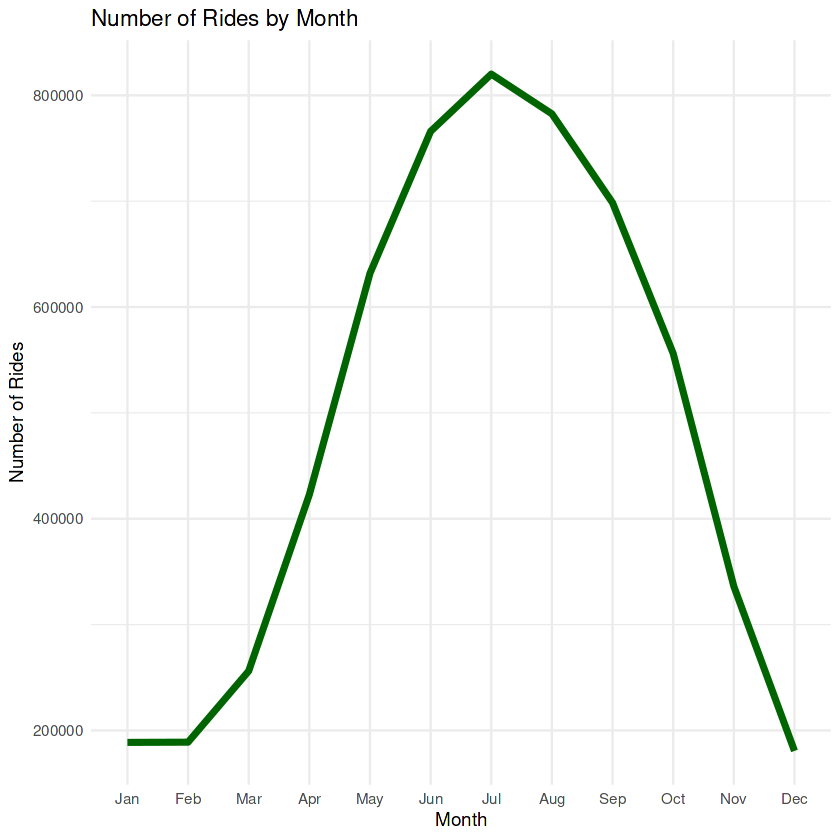

Saving 12.5 x 6.67 in image


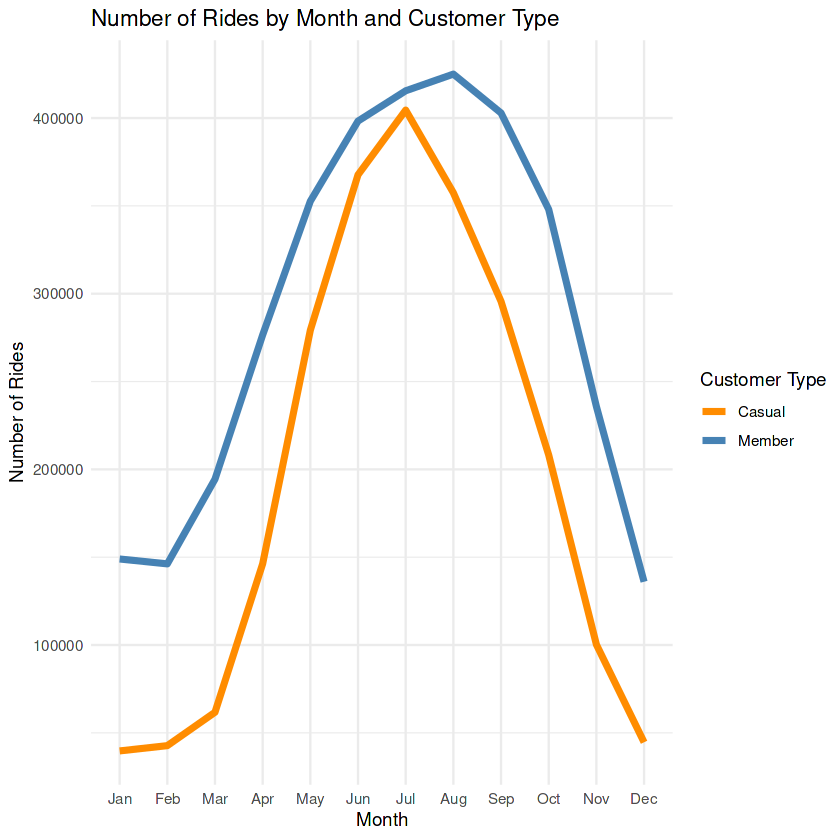

In [25]:
#Plotting the Number of Rides by Month
options(scipen = 999)
all_trips$count <- 1

all_trips$month <- factor(format(as.Date(paste("2023", all_trips$month, "01", sep = "-")), "%b"),
                          levels = month.abb)

ride_counts <- all_trips %>%
  group_by(month) %>%
  summarise(number_of_rides = sum(count), .groups = 'drop')

ggplot(ride_counts, aes(x = month, y = number_of_rides, group = 1)) +
  geom_line(aes(), linewidth = 1.5, color = 'darkgreen') +
  labs(x = "Month", y = "Number of Rides", title = 'Number of Rides by Month') +
  scale_x_discrete(labels = month.abb) +  
  theme_minimal()


#Number of rides by Month and Customer type
all_trips$count <- 1

ride_counts <- all_trips %>%
  group_by(month, member_casual) %>%
  summarise(number_of_rides = sum(count), .groups = 'drop')  

ggplot(ride_counts, aes(x = month, y = number_of_rides, color = member_casual, group = member_casual)) +
  geom_line(aes(), linewidth = 1.5) +
  scale_color_manual(values = c("casual" = "darkorange", "member" = "steelblue"),
                     labels = c("Casual", "Member")) +
  labs(x = "Month", y = "Number of Rides", title = 'Number of Rides by Month and Customer Type', color = "Customer Type") +
  scale_x_discrete(labels = month.abb) +  
  theme_minimal()
ggsave('Number of Rides by Month and Customer Type.png')



- In general, members take more bike rides than casual customers in every month of the year, but this difference become much less pronounced in June and July and it's larger in the winter months. This suggests that casual customers exhibit higher engagement during the peak summer months.
- Members take more rides from June to September, with the peak being in August; this is a clear indicator that members actively use Cyclistic bikes during the summer. Members take significantly fewer rides from late autumn through the entire winter, reaching its trough in December.
- Casual customers show a similar pattern, taking more bike rides from June to August, with the peak being in July. They take significantly fewer rides in the winter, reaching the lowest point in January.
- This way, both types of customers take more rides from June to the start of September, summer being the peak season when Cyclistic experience higher demand.
- Both types of customers use the bikes the least in the winter.
- Cyclistic bikes are more used during the warmer months when people are more inclined to engage in outdoor activities.

Now for the average ride length.

Saving 12.5 x 6.67 in image


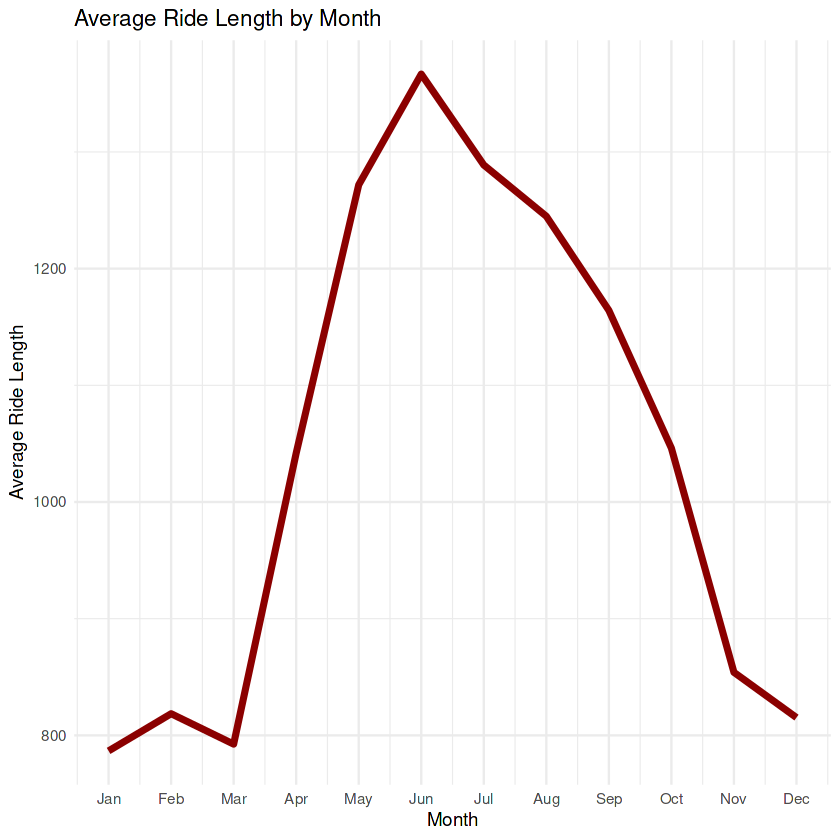

Saving 12.5 x 6.67 in image


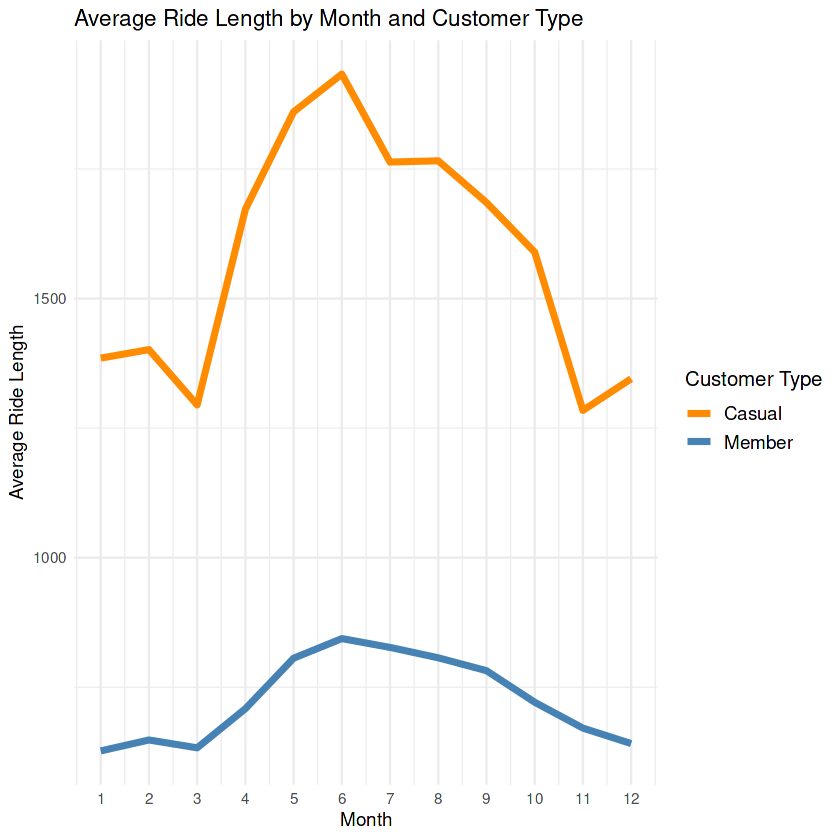

In [26]:
#Plotting the Average Ride Length by Month
all_trips$month <- as.numeric(factor(all_trips$month, levels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")))

ride_avg_length <- all_trips %>%
  group_by(month) %>%
  summarise(average_ride_length = mean(ride_length))

ggplot(ride_avg_length, aes(x = month, y = average_ride_length)) +
  geom_line(aes(group = 1), linewidth = 1.5, color = 'darkred') +  # Add group = 1
  labs(x = "Month", y = "Average Ride Length", title = 'Average Ride Length by Month') +
  scale_x_continuous(breaks = 1:12, labels = month.abb) +  
  theme_minimal()
ggsave('Average Ride Length by Month.png')

#Average Ride Length by Month and Customer Type
all_trips$count <- 1

ride_avg_length <- all_trips %>%
  group_by(month, member_casual) %>%
  summarise(average_ride_length = mean(ride_length), .groups = 'drop')  

par(pty = "s", mai = c(0.2, 0.2, 0.2, 0.2))

ggplot(ride_avg_length, aes(x = month, y = average_ride_length, color = member_casual)) +
  geom_line(aes(group = member_casual), linewidth = 1.5) +
  scale_color_manual(values = c("casual" = "darkorange", "member" = "steelblue"),
                     labels = c("Casual", "Member")) +
  labs(x = "Month", y = "Average Ride Length", title = 'Average Ride Length by Month and Customer Type', color = "Customer Type") +
  scale_x_continuous(breaks = 1:12) +
  theme_minimal() +
  theme(legend.text = element_text(size = 11),  
        legend.title = element_text(size = 12)) 

ggsave('Average Ride Length by Month and Customer Type.png')



- On average, casual members take much longer rides (more than double the duration) than members in every month of the year.
- Casual users take longer rides in May and June, followed by July and August. They take the shortest rides on November and March, followed by the other winter months.
- Members take somewhat longer rides from June through September and shorter in the winter months, but this variability is much smaller throughout all the months than for casual riders.
- Casual users vary their trip duration much more according to the month of the year, suggesting that their trip lengths are more influenced by seasonal factors. Members show less variability in their ride durations, indicating more consistent trip lengths throughout the year.

From the monthly analysis we can get more conclusive insights:
- Both members and casual customers show a clear seasonal pattern in bike ride usage. The warmer months of June to September experience higher ride volumes for both customer types, indicating increased demand during the summer season. Conversely, ride volumes decrease significantly during the winter months, highlighting a seasonal decline in bike usage.
- Members consistently take more rides than casual customers throughout the year. However, the difference in ride volume becomes less pronounced in June and July, suggesting that casual customers exhibit higher engagement during the peak summer months. 
- On average, casual users take much longer rides compared to members in every month of the year. Casual users demonstrate greater variation in ride duration based on the month, while members display more consistent ride durations throughout the year.
- The analysis suggests that seasonal factors strongly influence ride volumes and durations for both customer types. The warmer months and favorable weather conditions during the summer encourage higher bike ride usage, while the colder winter months result in decreased demand.

### Hourly Analysis
Now we want to understand the time when members and casual customers use Cyclistic's bikes to spot peak hours.

First a general analysis of the starting and ending hours.\
*Note: For practical purposes, I'm going to refer to hours as the total time between the starting hour and the minute before it ends, for instance, 4:00 hours means between 4:00 and 4:59 hours.*

Saving 12.5 x 6.67 in image


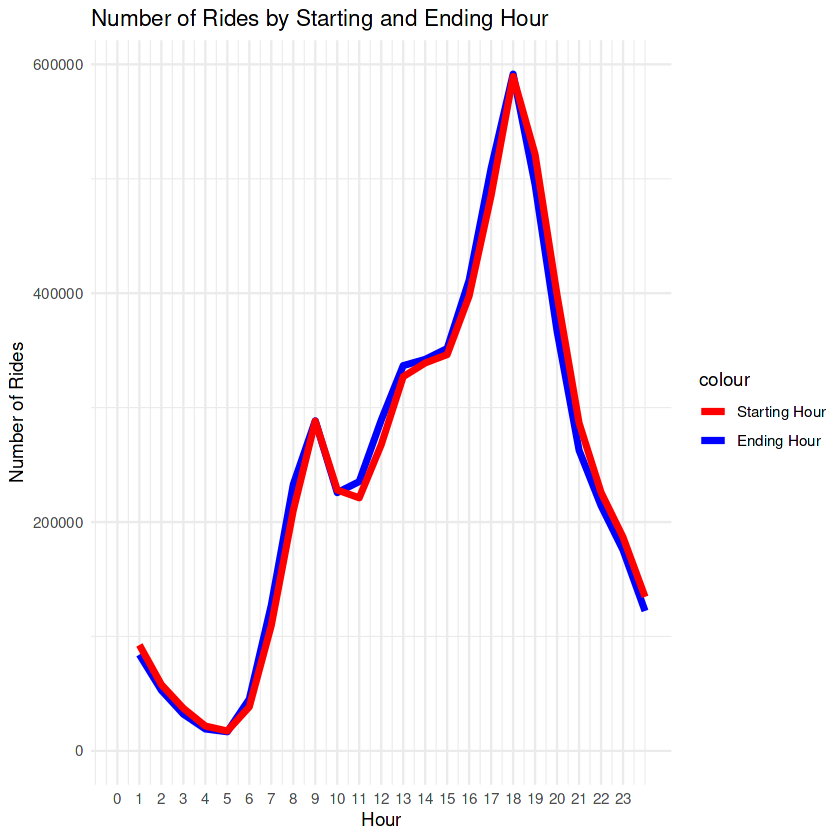

Saving 12.5 x 6.67 in image


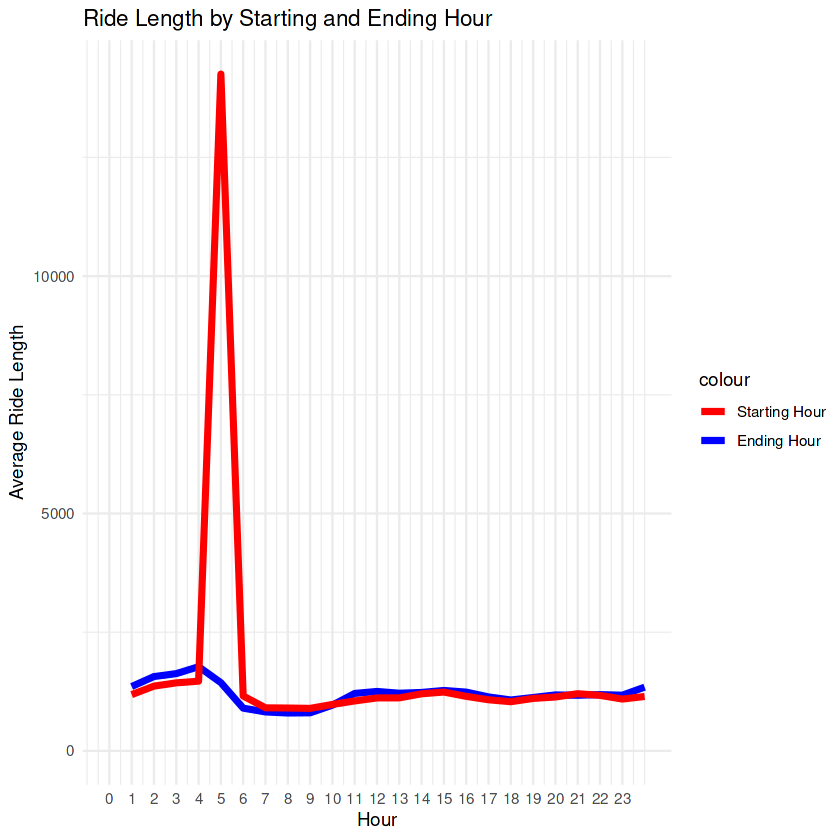

In [27]:
#Comparing the Number of Rides by Starting and Ending hours
all_trips$count <- 1

starting_hour_counts <- all_trips %>%
  group_by(starting_hour) %>%
  summarise(number_of_rides = sum(count))

ending_hour_counts <- all_trips %>%
  group_by(ending_hour) %>%
  summarise(number_of_rides = sum(count))

starting_hour_counts$start_hour <- factor(starting_hour_counts$starting_hour)
ending_hour_counts$end_hour <- factor(ending_hour_counts$ending_hour)

ggplot() +
  geom_line(data = starting_hour_counts, aes(x = as.numeric(start_hour), y = number_of_rides, color = "Starting Hour", group = 1), linewidth = 1.5) +
  geom_line(data = ending_hour_counts, aes(x = as.numeric(end_hour), y = number_of_rides, color = "Ending Hour", group = 1), linewidth = 1.5) +
  scale_color_manual(values = c("Starting Hour" = "blue", "Ending Hour" = "red"),
                     labels = c("Starting Hour", "Ending Hour")) +
  labs(x = "Hour", y = "Number of Rides", title = "Number of Rides by Starting and Ending Hour") +
  scale_x_continuous(breaks = 0:23, labels = 0:23) +
  theme_minimal() +
  expand_limits(x = 0, y = 0)  
  
ggsave('Number of Rides by Starting and Ending Hour.png')
  
#Comparing the Average Ride Length by Starting and Ending Hours
ride_length_start_hour <- all_trips %>%
  group_by(starting_hour) %>%
  summarise(average_ride_length = mean(ride_length))

ride_length_end_hour <- all_trips %>%
  group_by(ending_hour) %>%
  summarise(average_ride_length = mean(ride_length))

ride_length_start_hour$start_hour <- factor(ride_length_start_hour$starting_hour)
ride_length_end_hour$end_hour <- factor(ride_length_end_hour$ending_hour)

ggplot() +
  geom_line(data = ride_length_start_hour, aes(x = as.numeric(start_hour), y = average_ride_length, color = "Starting Hour", group = 1), linewidth = 1.5) +
  geom_line(data = ride_length_end_hour, aes(x = as.numeric(end_hour), y = average_ride_length, color = "Ending Hour", group = 1), linewidth = 1.5) +
  scale_color_manual(values = c("Starting Hour" = "blue", "Ending Hour" = "red"),
                     labels = c("Starting Hour", "Ending Hour")) +
  labs(x = "Hour", y = "Average Ride Length", title = "Ride Length by Starting and Ending Hour") +
  scale_x_continuous(breaks = 0:23, labels = 0:23) +
  theme_minimal() +
  expand_limits(x = 0, y = 0)

ggsave('Ride Length by Starting and Ending Hour.png')



- First, we can see that the starting hours and ending hours for the number of rides are basically the same, with tiny changes for the ending hour that are mainly for the hour after the ride started. This is because, we saw earlier that the average ride length is roughly 19 minutes, so it's very likely that most rides will start and end inside the range of the same hour of the day or only crossing to the next hour at most. Since both hours would give us the same results, we'll proceed to analyze the number of rides by hour of the day based on the starting hours.
- For the average ride length both lines are the same except for a huge increase at the 4:00 hours, for the ending time. 
To investigate this case we compared the ride lengths for two different hours to see if there were outliers in the data. We found that for there are more higher values for the 4:00 ending hours and a relatively lack of lower values than the other hours, so this means it's not more common for rides that end at this time to last longer. We'll still be using the starting hour for the average ride length to be consistent, but taking into account this more usual behavior.


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Saving 12.5 x 6.67 in image
`summarise()` has grouped output by 'starting_hour'. You can override using the
`.groups` argument.


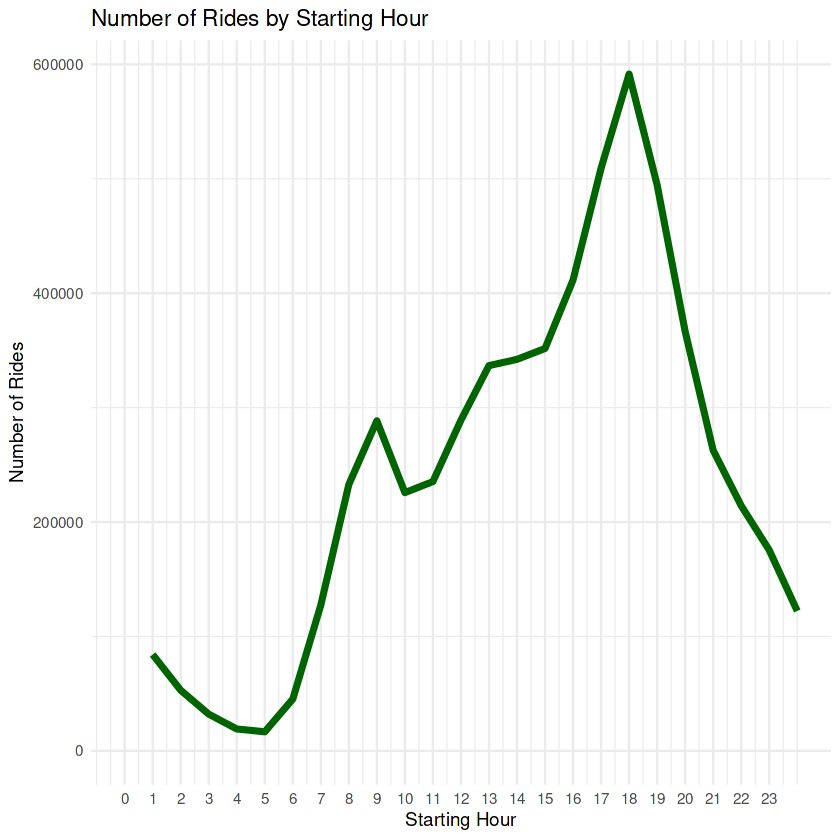

Saving 12.5 x 6.67 in image


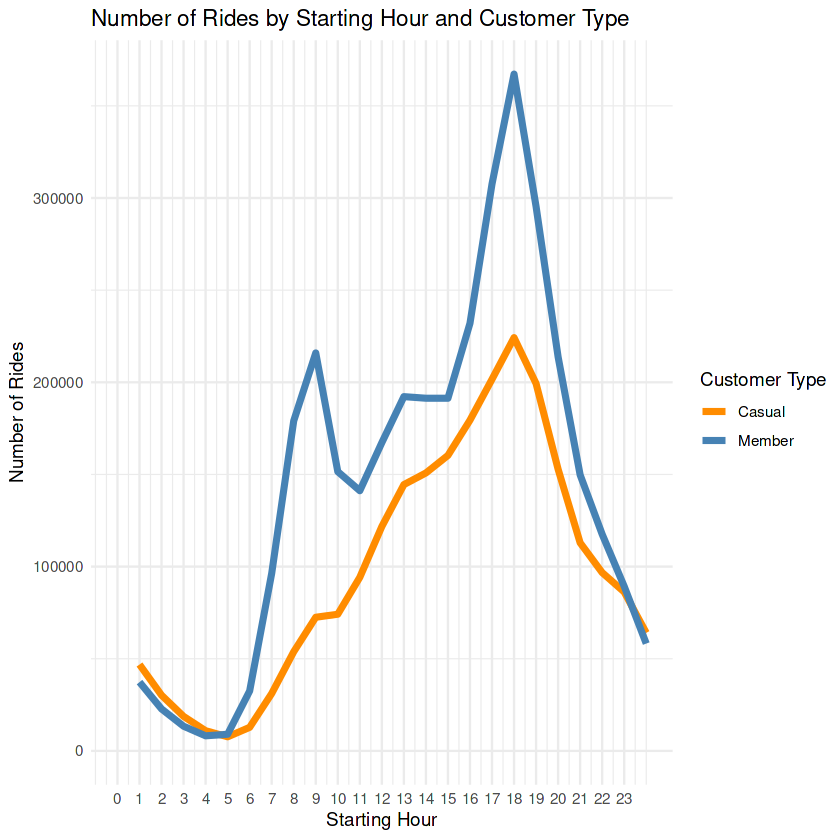

In [28]:
#Plotting the Number of Rides by Starting Hour
all_trips$count <- 1

ride_counts <- all_trips %>%
  group_by(starting_hour) %>%
  summarise(number_of_rides = sum(count))

ride_counts$starting_hour <- factor(ride_counts$starting_hour)

ggplot(ride_counts, aes(x = as.numeric(starting_hour), y = number_of_rides)) +
  geom_line(color = "darkgreen", size = 1.5) +
  labs(x = "Starting Hour", y = "Number of Rides", title = "Number of Rides by Starting Hour") +
  scale_x_continuous(breaks = 0:23, labels = 0:23) +
  theme_minimal() +
  expand_limits(x = 0, y = 0)

ggsave('Number of Rides by Starting Hour.png')

#Plotting the Number of Rides by Starting Hour and Customer Type
all_trips$count <- 1

ride_counts <- all_trips %>%
  group_by(starting_hour, member_casual) %>%
  summarise(number_of_rides = sum(count))

ride_counts$starting_hour <- factor(ride_counts$starting_hour)

ggplot(ride_counts, aes(x = as.numeric(starting_hour), y = number_of_rides, color = member_casual)) +
  geom_line(size = 1.5) +
  scale_color_manual(values = c("darkorange", "steelblue"),
                     labels = c("Casual", "Member")) +
  labs(x = "Starting Hour", y = "Number of Rides", title = "Number of Rides by Starting Hour and Customer Type", color = "Customer Type") +
  scale_x_continuous(breaks = 0:23, labels = 0:23) +
  theme_minimal() +
  expand_limits(x = 0, y = 0)

ggsave('Number of Rides by Starting Hour and Customer Type.png')

- The peak hours for bike use are from 15:00 to 19:00 hours, with the highest traffic at 17:00 hours.
- Users take many more rides in the afternoon and evening than in the morning and noon.
- Both types of customers follow the pattern of taking more bike rides on the peak hours found from 3:00 PM to 7:00 PM.
- Members also show a pattern of taking more bike rides in the morning from 7:00 AM to 9:00 (peak at 8:00 AM), while casual riders show only a very slight increase in use during these hours.
- The difference in the number of rides by type of customer is most noticeable in the peak hours, both in the late afternoon and in the morning.
- Since there's a slight increase of rides in the morning for casual riders on weekdays, but their average ride length is low during these hours, it seems that some casual riders might sometimes use Cyclistic bikes for commuting and other day-to-day activities, but these represent a very low percentage of all casual riders.

Now for the average ride length:

`summarise()` has grouped output by 'starting_hour'. You can override using the
`.groups` argument.
Saving 12.5 x 6.67 in image
`summarise()` has grouped output by 'starting_hour'. You can override using the
`.groups` argument.


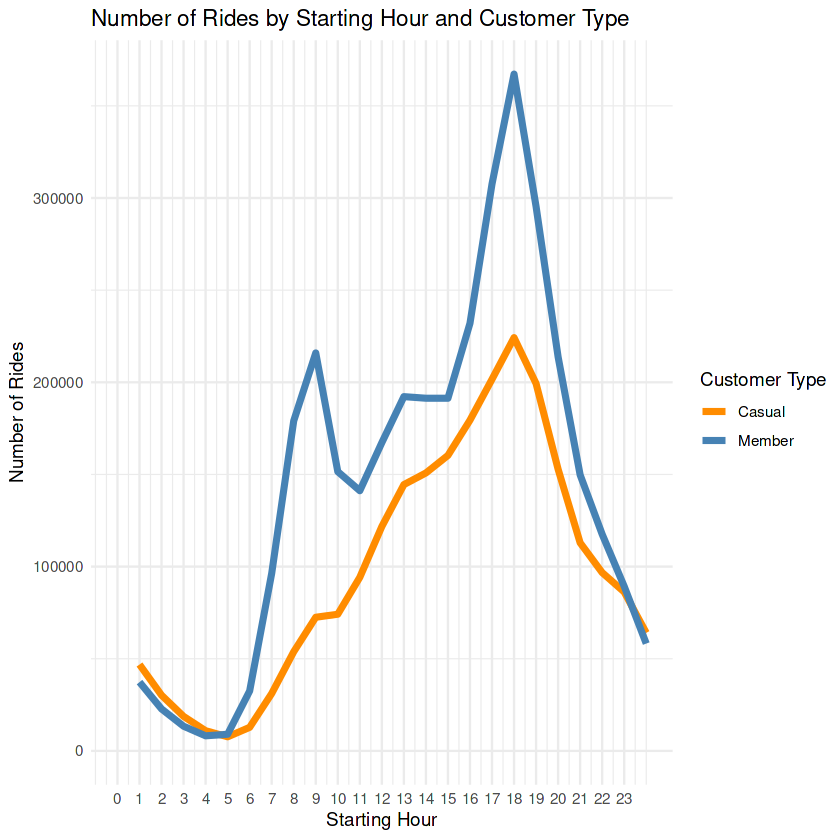

Saving 12.5 x 6.67 in image


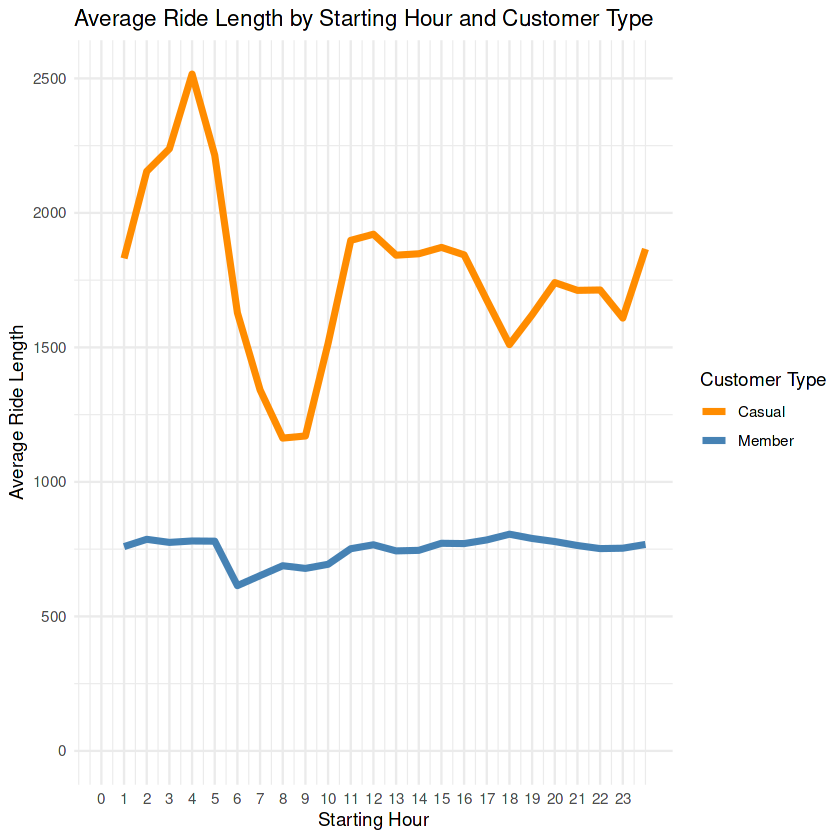

In [29]:
#Plotting the Average Ride Length by Starting Hour
all_trips$count <- 1

ride_counts <- all_trips %>%
  group_by(starting_hour, member_casual) %>%
  summarise(number_of_rides = sum(count))

ride_counts$starting_hour <- factor(ride_counts$starting_hour)

ggplot(ride_counts, aes(x = as.numeric(starting_hour), y = number_of_rides, color = member_casual)) +
  geom_line(size = 1.5) +
  scale_color_manual(values = c("darkorange", "steelblue"),
                     labels = c("Casual", "Member")) +
  labs(x = "Starting Hour", y = "Number of Rides", title = "Number of Rides by Starting Hour and Customer Type", color = "Customer Type") +
  scale_x_continuous(breaks = 0:23, labels = 0:23) +
  theme_minimal() +
  expand_limits(x = 0, y = 0)

ggsave('Number of Rides by Starting Hour and Customer Type.png')

#Plotting the Average Ride Length by Starting Hour and Type of Customer
all_trips$count <- 1

ride_lengths <- all_trips %>%
  group_by(starting_hour, member_casual) %>%
  summarise(average_ride_length = mean(ride_length, na.rm = TRUE))

ride_lengths$starting_hour <- factor(ride_lengths$starting_hour)

ggplot(ride_lengths, aes(x = as.numeric(starting_hour), y = average_ride_length, color = member_casual)) +
  geom_line(size = 1.5) +
  scale_color_manual(values = c("darkorange", "steelblue"),
                     labels = c("Casual", "Member")) +
  labs(x = "Starting Hour", y = "Average Ride Length", title = "Average Ride Length by Starting Hour and Customer Type", color = "Customer Type") +
  scale_x_continuous(breaks = 0:23, labels = 0:23) +
  theme_minimal() +
  expand_limits(x = 0, y = 0)

ggsave('Average Ride Length by Starting Hour and Customer Type.png')

- Interestingly, the rides that last the most for casual customers on average start between the 23:00 hours and the 4:00 hours.
- For casual customers, the peak occurs at 3:00 hours, which is in harmony with what we found about the 4:00 ending hours, since it's expected that rides might end in the same or next hour.
- For both types of customer, the rides are shorter from 5:00 to 9:00 hours. However, the difference for members is minimal, while for casual users it's very noticeable.
- Members show a much steadier pattern for the average ride length at every hour of the day.

Since we found before differences in patterns for weekdays and weekends, now let's analyze the hourly data comparing these to see if we can spot other trends based on day of week.

`summarise()` has grouped output by 'starting_hour'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'starting_hour'. You can override using the
`.groups` argument.


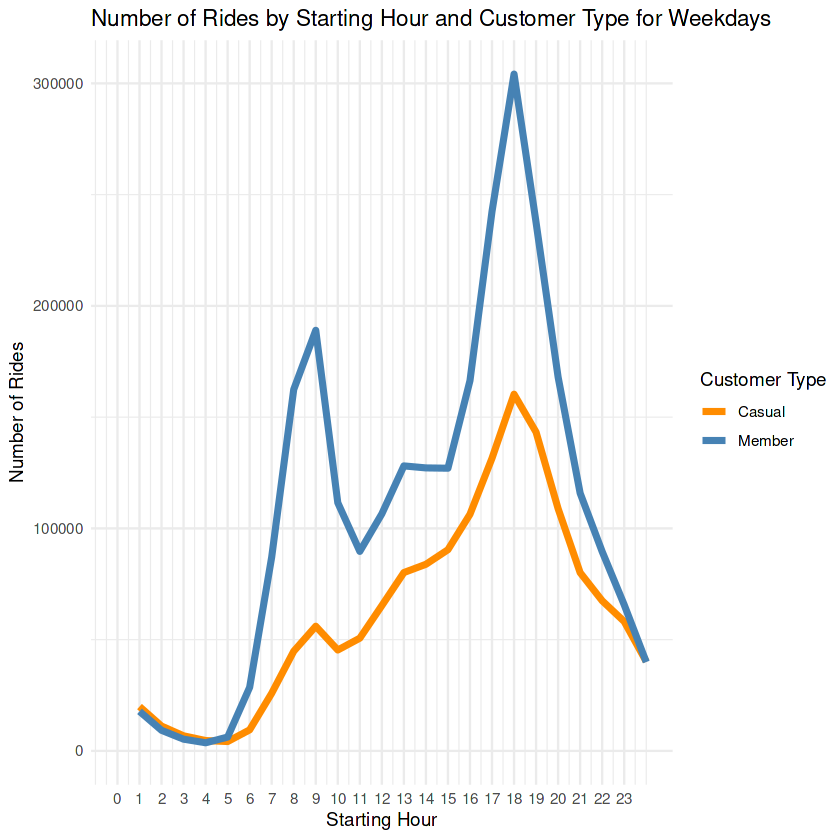

`summarise()` has grouped output by 'starting_hour'. You can override using the
`.groups` argument.


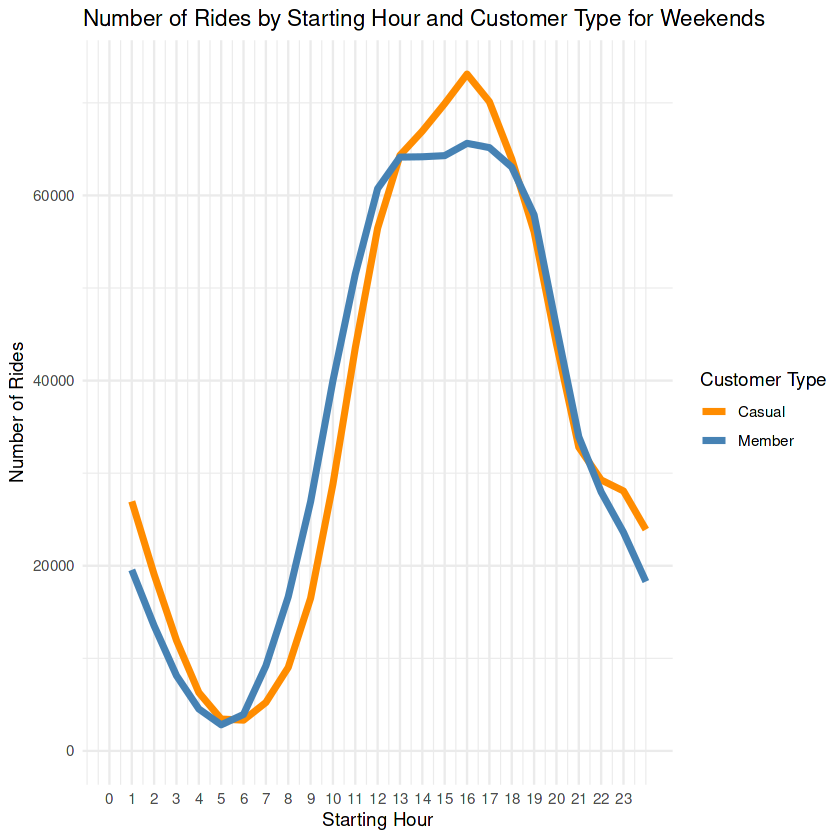

`summarise()` has grouped output by 'starting_hour'. You can override using the
`.groups` argument.


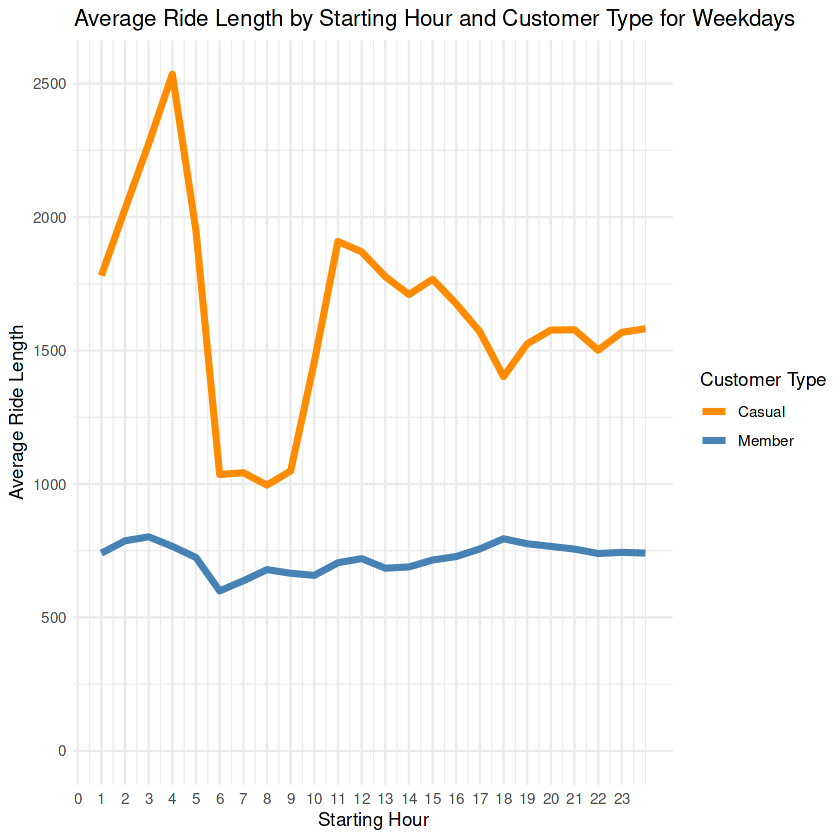

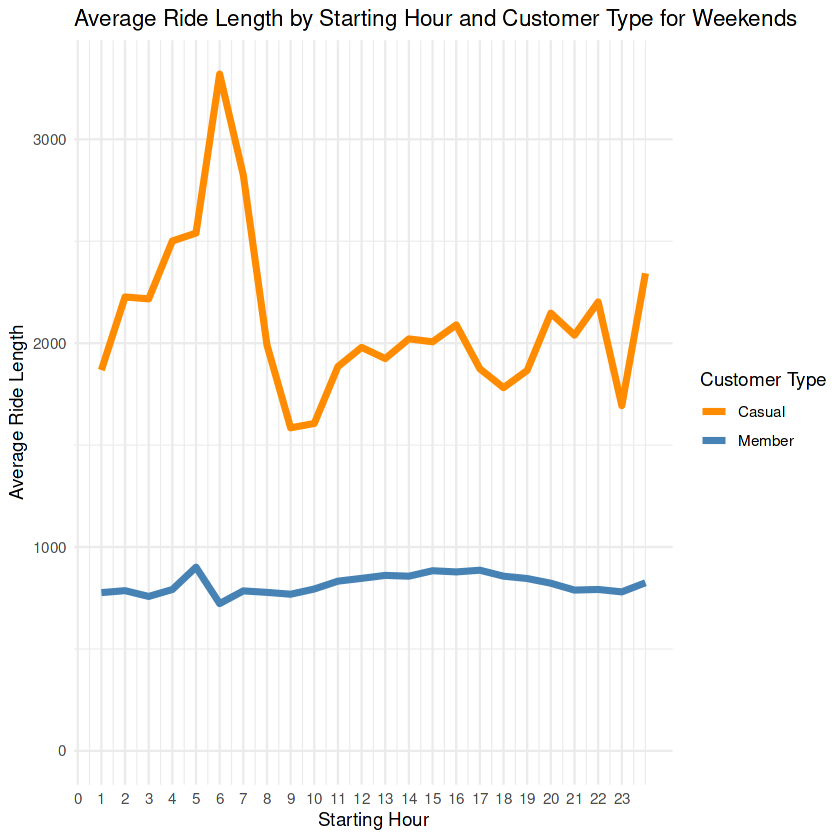

In [30]:
#Plotting the Number of Rides by Starting Hour and Customer Type for Weekdays
all_trips$count <- 1

ride_counts <- all_trips %>%
  filter(weekday %in% c("Mon", "Tue", "Wed", "Thu", "Fri")) %>%
  group_by(starting_hour, member_casual) %>%
  summarise(number_of_rides = sum(count))

ride_counts$starting_hour <- factor(ride_counts$starting_hour)

ggplot(ride_counts, aes(x = as.numeric(starting_hour), y = number_of_rides, color = member_casual)) +
  geom_line(size = 1.5) +
  scale_color_manual(values = c("darkorange", "steelblue"),
                     labels = c("Casual", "Member")) +
  labs(x = "Starting Hour", y = "Number of Rides", title = "Number of Rides by Starting Hour and Customer Type for Weekdays", color = "Customer Type") +
  scale_x_continuous(breaks = 0:23, labels = 0:23) +
  theme_minimal() +
  expand_limits(x = 0, y = 0)

#Plotting the Number of Rides by Starting Hour and Customer Type for Weekends
all_trips$count <- 1

ride_counts <- all_trips %>%
  filter(weekday %in% c("Sat", "Sun")) %>%
  group_by(starting_hour, member_casual) %>%
  summarise(number_of_rides = sum(count))

ride_counts$starting_hour <- factor(ride_counts$starting_hour)

ggplot(ride_counts, aes(x = as.numeric(starting_hour), y = number_of_rides, color = member_casual)) +
  geom_line(size = 1.5) +
  scale_color_manual(values = c("darkorange", "steelblue"),
                     labels = c("Casual", "Member")) +
  labs(x = "Starting Hour", y = "Number of Rides", title = "Number of Rides by Starting Hour and Customer Type for Weekends", color = "Customer Type") +
  scale_x_continuous(breaks = 0:23, labels = 0:23) +
  theme_minimal() +
  expand_limits(x = 0, y = 0)

#Plotting the Average Ride Length by Starting Hour and Customer Type for Weekdays
ride_lengths <- all_trips %>%
  filter(weekday %in% c("Mon", "Tue", "Wed", "Thu", "Fri")) %>%
  group_by(starting_hour, member_casual) %>%
  summarise(average_ride_length = mean(ride_length, na.rm = TRUE))

ride_lengths$starting_hour <- factor(ride_lengths$starting_hour)

ggplot(ride_lengths, aes(x = as.numeric(starting_hour), y = average_ride_length, color = member_casual)) +
  geom_line(size = 1.5) +
  scale_color_manual(values = c("darkorange", "steelblue"),
                     labels = c("Casual", "Member")) +
  labs(x = "Starting Hour", y = "Average Ride Length", title = "Average Ride Length by Starting Hour and Customer Type for Weekdays", color = "Customer Type") +
  scale_x_continuous(breaks = 0:23, labels = 0:23) +
  theme_minimal() +
  expand_limits(y = 0)

#Plotting the Average Ride Length by Starting Hour and Customer Type for Weekends
ride_lengths <- all_trips %>%
  filter(weekday %in% c("Sat", "Sun")) %>%
  group_by(starting_hour, member_casual) %>%
  summarise(average_ride_length = mean(ride_length, na.rm = TRUE))

ride_lengths$starting_hour <- factor(ride_lengths$starting_hour)

ggplot(ride_lengths, aes(x = as.numeric(starting_hour), y = average_ride_length, color = member_casual)) +
  geom_line(size = 1.5) +
  scale_color_manual(values = c("darkorange", "steelblue"),
                     labels = c("Casual", "Member")) +
  labs(x = "Starting Hour", y = "Average Ride Length", title = "Average Ride Length by Starting Hour and Customer Type for Weekends", color = "Customer Type") +
  scale_x_continuous(breaks = 0:23, labels = 0:23) +
  theme_minimal() +
  expand_limits(y = 0)

- The patterns for weekdays is basically the same for both types of customers and for the number of rides and the average ride length, so the hourly analysis found earlier can be passed to the trends for weekdays from Monday to Friday.
- The patterns for weekends dramatically change for the number of rides and slightly for the average ride length.
- On the weekends, both types of customers show a similar pattern, with most rides taken from 12:00 hours to 17:00 hours and the peak being at 15:00 hours.
- The highest average ride lengths on the weekends for casual customers take place between 3:00 AM and 6:00 AM while the lowest are from 8:00 AM to 9:00 AM.
- The average ride length for members by the hour become even steadier on weekends.

From the hourly analysis we can draw more summarized and conclusive insights:
- On weekdays, the peak hours for bike rides are from 15:00 to 19:00, with the highest traffic observed at 17:00. Both members and casual customers show increased bike usage during these hours, indicating a high demand for Cyclistic bikes in the late afternoon and early evening, suggesting that members and some casual riders may use the bikes to commute back home and other day-to-day activities.
- On weekdays, members exhibit a distinct trend of increased bike rides in the morning hours, particularly from 7:00 to 9:00. Casual riders do not show the same level of activity during this time, suggesting that members may use Cyclistic bikes for commuting or daily routines.
- On weekends, there is a noticeable shift in the number of rides, with a concentration between 12:00 and 17:00 and a peak at 15:00 for both customer types. This indicates a shift in usage patterns for recreational activities.
- Casual customers have longer average ride lengths during early morning hours on weekends (3:00 to 6:00), potentially indicating longer rides for late-night leisure activities. Members, on the other hand, exhibit more consistent ride lengths throughout the day, suggesting more consistent usage patterns.
- Members consistently take more rides and show steadier patterns throughout the day, which suggests they use the bikes mainly for day-to-day activities and commuting on weekdays, and for leisure on weekends. Casual customers exhibit more variability and are more influenced by factors such as weekends and specific hours, which means they use the bikes mainly for leisure activities both during the day and late-night.

### Bike Stations Analysis
Now we're going to analyze the stations that are most frequented by each type of customer.

This time we'll be analyzing mostly the end station names, to understand better the destinations of the rides for each type of customer.

We'll get the 10 most popular stations for each type of member on weekdays and on weekends.

`summarise()` has grouped output by 'end_station_name'. You can override using
the `.groups` argument.


# A tibble: 20 × 4
# Groups:   member_casual [2]
   end_station_name            member_casual number_of_rides average_ride_length
   <chr>                       <chr>                   <dbl>               <dbl>
 1 Streeter Dr & Grand Ave     casual                  33661               2145.
 2 DuSable Lake Shore Dr & No… casual                  15736               1759.
 3 DuSable Lake Shore Dr & Mo… casual                  15341               2129.
 4 Millennium Park             casual                  15268               2101.
 5 Michigan Ave & Oak St       casual                  15155               2123.
 6 Theater on the Lake         casual                  10831               1896.
 7 Shedd Aquarium              casual                  10563               1702.
 8 Wells St & Concord Ln       casual                   9330                922.
 9 Clark St & Armitage Ave     casual                   7914               1199.
10 Clark St & Elm St           casual                   7809

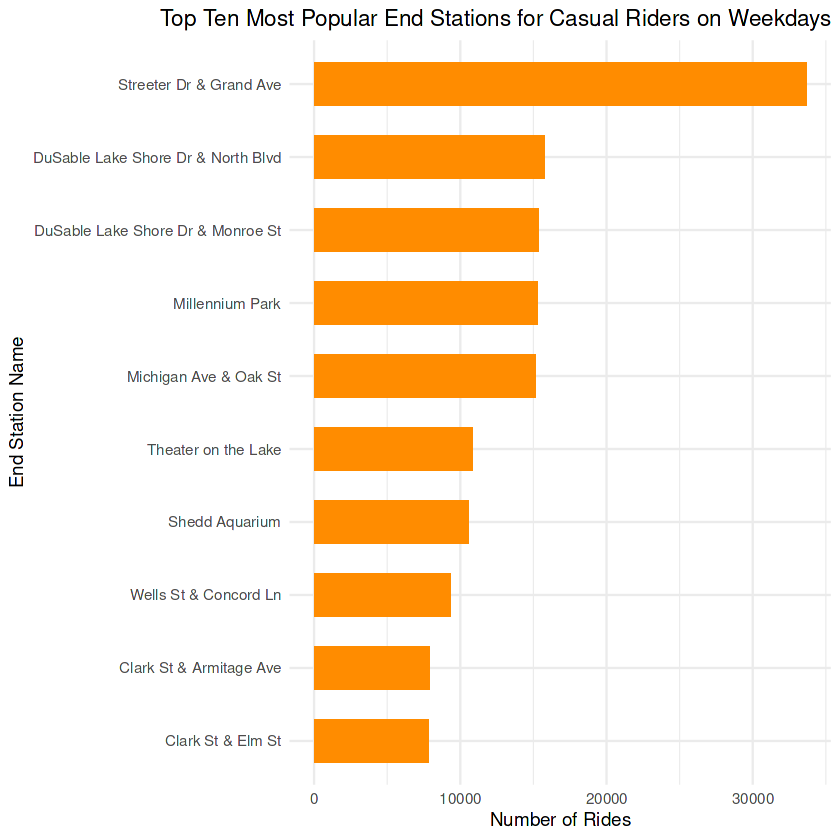

`summarise()` has grouped output by 'end_station_name'. You can override using
the `.groups` argument.


# A tibble: 20 × 4
# Groups:   member_casual [2]
   end_station_name            member_casual number_of_rides average_ride_length
   <chr>                       <chr>                   <dbl>               <dbl>
 1 Streeter Dr & Grand Ave     casual                  25719               2265.
 2 DuSable Lake Shore Dr & Mo… casual                  13902               2260.
 3 Michigan Ave & Oak St       casual                  11396               2254.
 4 Millennium Park             casual                  11252               2285.
 5 DuSable Lake Shore Dr & No… casual                  10403               1950.
 6 Theater on the Lake         casual                   8682               2053.
 7 Shedd Aquarium              casual                   7957               1905.
 8 Wells St & Concord Ln       casual                   6439               1082.
 9 Dusable Harbor              casual                   6362               2203.
10 Clark St & Lincoln Ave      casual                   6202

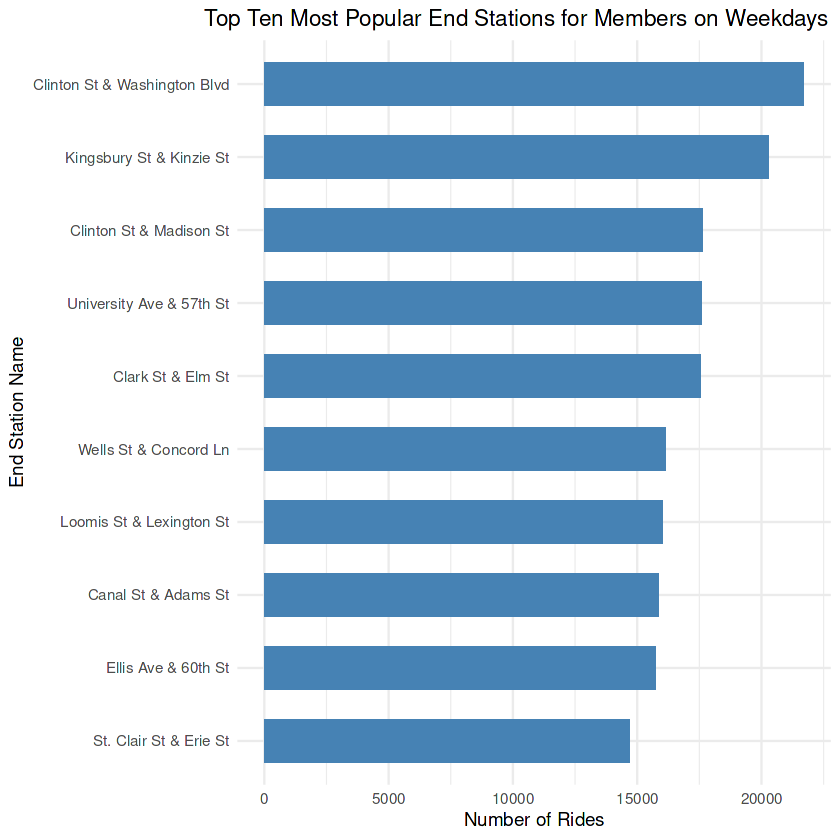

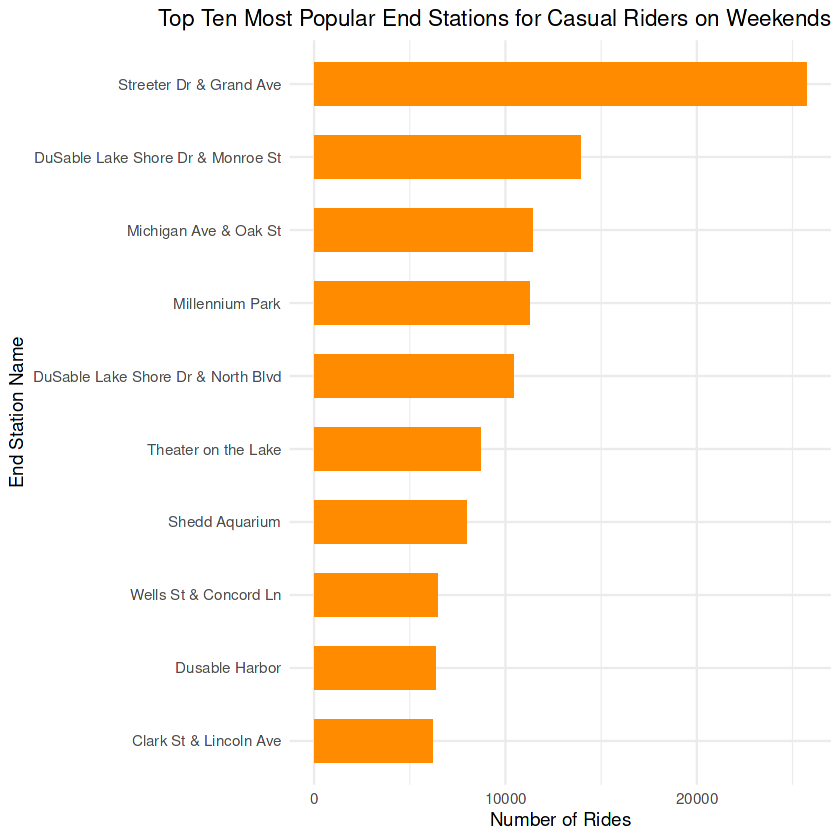

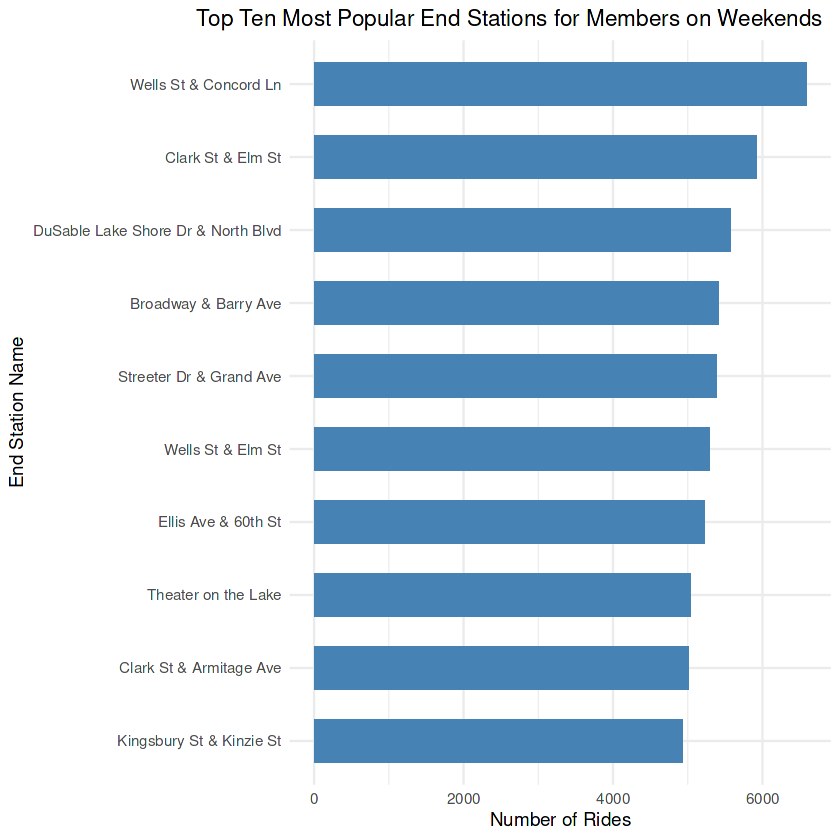

In [31]:
#Stations Analysis
#Top 10 End Stations by Customer Type for Weekdays
all_trips$count <- 1
top10_end_stations_weekdays <- all_trips %>%
  filter(end_station_name != "", weekday %in% c("Mon", "Tue", "Wed", "Thu", "Fri")) %>%
  group_by(end_station_name, member_casual) %>%
  summarise(number_of_rides = sum(count),
            average_ride_length = mean(ride_length, na.rm = TRUE)) %>%
  group_by(member_casual) %>%
  top_n(n = 10, wt = number_of_rides) %>%
  arrange(member_casual, desc(number_of_rides))

print(top10_end_stations_weekdays)

#Horizontal bar chart for casual members on weekdays
ggplot(top10_end_stations_weekdays[top10_end_stations_weekdays$member_casual == "casual",], aes(x = number_of_rides, y = reorder(end_station_name, number_of_rides))) +
  geom_bar(stat = "identity", fill = "darkorange", width = 0.6) +
  labs(title = "Top Ten Most Popular End Stations for Casual Riders on Weekdays",
       x = "Number of Rides",
       y = "End Station Name") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 1))

#Horizontal bar chart for members on weekdays
ggplot(top10_end_stations_weekdays[top10_end_stations_weekdays$member_casual == "member",], aes(x = number_of_rides, y = reorder(end_station_name, number_of_rides))) +
  geom_bar(stat = "identity", fill = "steelblue", width = 0.6) +
  labs(title = "Top Ten Most Popular End Stations for Members on Weekdays",
       x = "Number of Rides",
       y = "End Station Name") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 1.1))

#Top 10 End Stations by Customer Type for Weekends
all_trips$count <- 1
top10_end_stations_weekends <- all_trips %>%
  filter(end_station_name != "", weekday %in% c("Sat", "Sun")) %>%
  group_by(end_station_name, member_casual) %>%
  summarise(number_of_rides = sum(count),
            average_ride_length = mean(ride_length, na.rm = TRUE)) %>%
  group_by(member_casual) %>%
  top_n(n = 10, wt = number_of_rides) %>%
  arrange(member_casual, desc(number_of_rides))

print(top10_end_stations_weekends)

#Horizontal bar chart for casual members on weekends
ggplot(top10_end_stations_weekends[top10_end_stations_weekends$member_casual == "casual",], aes(x = number_of_rides, y = reorder(end_station_name, number_of_rides))) +
  geom_bar(stat = "identity", fill = "darkorange", width = 0.6) +
  labs(title = "Top Ten Most Popular End Stations for Casual Riders on Weekends",
       x = "Number of Rides",
       y = "End Station Name") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 1))

#Horizontal bar chart for members on weekends
ggplot(top10_end_stations_weekends[top10_end_stations_weekends$member_casual == "member",], aes(x = number_of_rides, y = reorder(end_station_name, number_of_rides))) +
  geom_bar(stat = "identity", fill = "steelblue", width = 0.6) +
  labs(title = "Top Ten Most Popular End Stations for Members on Weekends",
       x = "Number of Rides",
       y = "End Station Name") +
  theme_minimal() +
  theme(plot.title = element_text(hjust = 1.1))

- The 5 most popular bike stations for casual riders on weekdays are Streeter Dr & Grand Ave, DuSable Lake Shore Dr & North Blvd, DuSable Lake Shore Dr & Monroe St, Millennium Park and Michigan Ave & Oak St; on weekends, the most popular stations are Streeter Dr & Grand Ave, DuSable Lake Shore Dr & Monroe St, Michigan Ave & Oak St, Millennium Park and DuSable Lake Shore Dr & North Blvd.
- The 5 most popular bike stations for members on weekdays are Clinton St & Washington Blvd, Kingsbury St & Kinzie St, Clinton St & Madison St, University Ave & 57th St and Clark St & Elm St; on weekends, the most popular stations are Wells St & Concord Ln, Clark St & Elm St, Broadway & Barry Ave, Wells St & Elm St and Ellis Ave & 60th St.
- For casual members, the most popular destination stations and their corresponding frequencies don't change so much for weekdays and weeekends. This suggests that casual users might use Cyclistic bikes for the same purpose on weekdays and weekdays, which is likely to be for leisure, because we can also see that the average ride length is around 30 minutes on weekdays and 35 on weekends, appropriate times to visit touristic places like parks, museums, aquariums and beaches.
- For members, the frequencies of the most popular destination stations change more on weekdays and weekends. This suggests that members might change their purpose to ride Cyclistic bikes based on weekdays and weekends; this shift should be work and day-to-day activities on weekdays, which is accompanied with some recreational activities on weekends because we can see that the average ride length on weekdays stays at around 5 minutes and on weekends at 15 minutes.

On Tableau, I plotted 4 maps of these end stations by customer type for weekdays and weekends, which you can see on https://medium.com/@jaimevelasquez/data-analytics-case-study-cyclistic-24f23da8f95a

- We can see on the maps that the stations that casual riders most frequent, both at weekdays and weekends, are located very close to the coast in general, close to parks, beaches and touristic areas. This reinforces our findings that casual riders mainly use Cyclistic bikes for leisure or recreational activities, including riding at parks, going to the beach, museums and other touristic attractions.
- The most popular stations that members frequent are located in the more urban Chicago areas that are close to corporate buildings, with a couple of stations close to the coast that are more frequented on weekends. This reinforce our findings that members mainly use Cyclistic bikes for commuting and daily routines on weekdays, and on weekends they use them a little more for leisure.

We can also confirm these trends by looking at the 10 most popular bike routes members and casual customers take and their average duration, or a quick station pair analysis:

In [32]:
#Station Pair Analysis
member_station_pairs <- all_trips %>%
  filter(member_casual == "member") %>%
  select(start_station_name, end_station_name)

casual_station_pairs <- all_trips %>%
  filter(member_casual == "casual") %>%
  select(start_station_name, end_station_name)

get_most_common_station_pairs <- function(data) {
  data %>%
    filter(start_station_name != "" & end_station_name != "") %>%
    group_by(start_station_name, end_station_name) %>%
    summarise(number_of_rides = n()) %>%
    arrange(desc(number_of_rides))
}

most_common_member_station_pairs <- get_most_common_station_pairs(member_station_pairs)
most_common_casual_station_pairs <- get_most_common_station_pairs(casual_station_pairs)

#Merge average ride length from all_trips data frame into most_common_member_station_pairs
most_common_member_station_pairs <- most_common_member_station_pairs %>%
  left_join(
    all_trips %>%
      group_by(start_station_name, end_station_name) %>%
      summarise(average_ride_length = mean(ride_length, na.rm = TRUE)),
    by = c("start_station_name", "end_station_name")
  )

#Merge average ride length from all_trips data frame into most_common_casual_station_pairs
most_common_casual_station_pairs <- most_common_casual_station_pairs %>%
  left_join(
    all_trips %>%
      group_by(start_station_name, end_station_name) %>%
      summarise(average_ride_length = mean(ride_length, na.rm = TRUE)),
    by = c("start_station_name", "end_station_name")
  )

head(most_common_member_station_pairs, 10)
head(most_common_casual_station_pairs, 10)

`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.
`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.


start_station_name,end_station_name,number_of_rides,average_ride_length
<chr>,<chr>,<int>,<dbl>
Ellis Ave & 60th St,University Ave & 57th St,6548,285.2118
University Ave & 57th St,Ellis Ave & 60th St,6179,299.7608
Ellis Ave & 60th St,Ellis Ave & 55th St,5953,311.9819
Ellis Ave & 55th St,Ellis Ave & 60th St,5531,328.1671
State St & 33rd St,Calumet Ave & 33rd St,3980,261.0530
Calumet Ave & 33rd St,State St & 33rd St,3838,248.9668
Loomis St & Lexington St,Morgan St & Polk St,3515,298.8147
Morgan St & Polk St,Loomis St & Lexington St,3342,316.8862
University Ave & 57th St,Kimbark Ave & 53rd St,2696,461.4341


start_station_name,end_station_name,number_of_rides,average_ride_length
<chr>,<chr>,<int>,<dbl>
Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,10317,2288.354
DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,6533,1944.149
DuSable Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,5105,1585.100
Michigan Ave & Oak St,Michigan Ave & Oak St,4556,2499.464
Millennium Park,Millennium Park,3955,2159.028
Montrose Harbor,Montrose Harbor,2948,2720.176
Streeter Dr & Grand Ave,DuSable Lake Shore Dr & Monroe St,2772,1572.612
Streeter Dr & Grand Ave,Millennium Park,2684,1937.231
Shedd Aquarium,Shedd Aquarium,2524,1301.440


- We can see that the most common routes for members are inside the urban areas where there are corporate buildings, residential zones and universities. On the other hand, the most common routes for casual riders involve going from and to parks, lakes, aquariums, touristic places and stations near the beach.
- The average ride lengths of the common routes for members only take between 4 and 7 minutes, while the average ride lengths of the common routes for casual riders take between 21 and 45 minutes. 

From the stations analysis, we can draw more conclusive and summarized insights:
- Casual customers consistently frequent the same destination stations on both weekdays and weekends, indicating that they primarily use the bikes for leisure and recreational activities. The average ride length of around 33 minutes supports this observation, as it suggests that they are likely exploring tourist attractions, parks, and other leisure spots.
- On weekends, members' destination station preferences vary more compared to weekdays, suggesting a shift in their purpose for using Cyclistic bikes. Short average ride lengths of approximately 5 minutes on weekdays suggest that members utilize the bikes for quick commutes and daily activities. However, on weekends, they engage in longer rides of around 15 minutes, likely exploring the city for leisure and recreational purposes.
- The geographic distribution of popular stations aligns with customer behaviors. Casual customers tend to frequent stations near the coast and tourist attractions, reflecting their preference for leisure activities. In contrast, members prefer stations in urban areas with corporate buildings, indicating their use for daily commutes and work-related travel.
- The most common routes for members are within urban areas, reflecting their need for quick and efficient transportation. In contrast, casual riders prefer routes that take them to parks, lakes, aquariums, and other tourist spots, suggesting their desire to enjoy scenic rides and explore the city.
- Members' routes tend to be short, indicating their focus on reaching destinations efficiently. In contrast, casual riders opt for longer routes, emphasizing their interest in leisurely rides and sightseeing.

### Type of Bike Analysis
Lastly, we're going to analyze the types of bikes. There are three types of bikes: Classic Bikes, Electric Bikes and Docked Bikes; we want to draw insights about the popularity and preference for a particular type of bike.

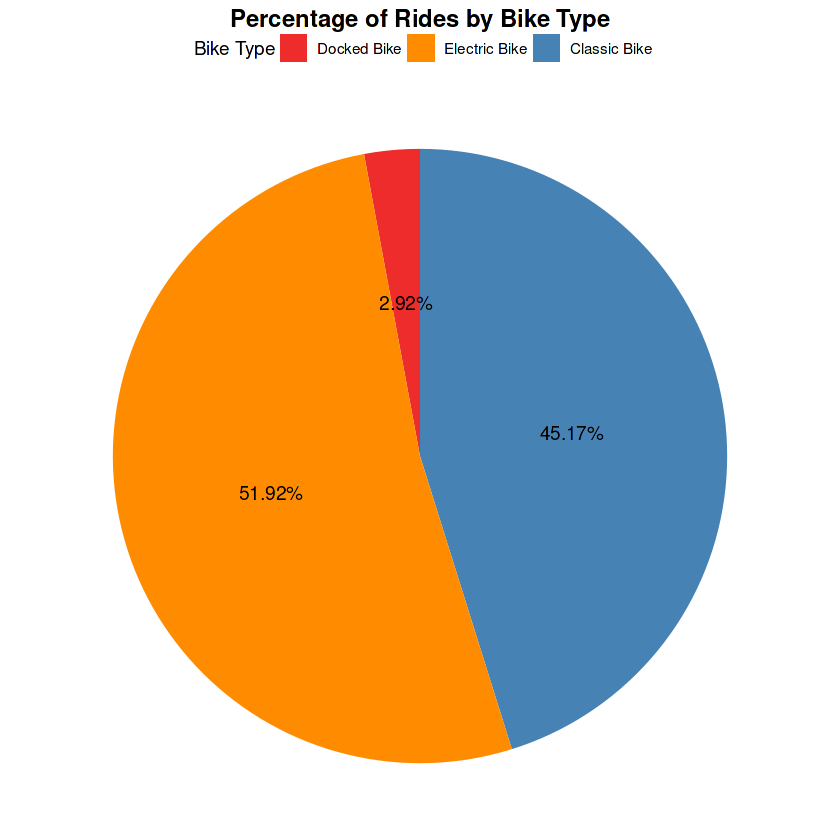

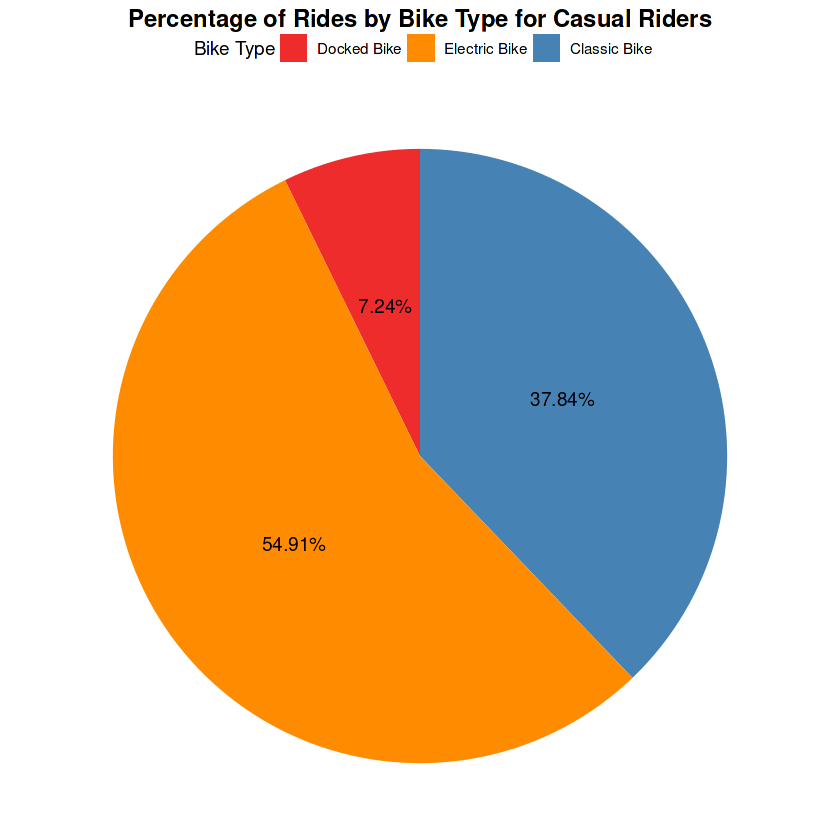

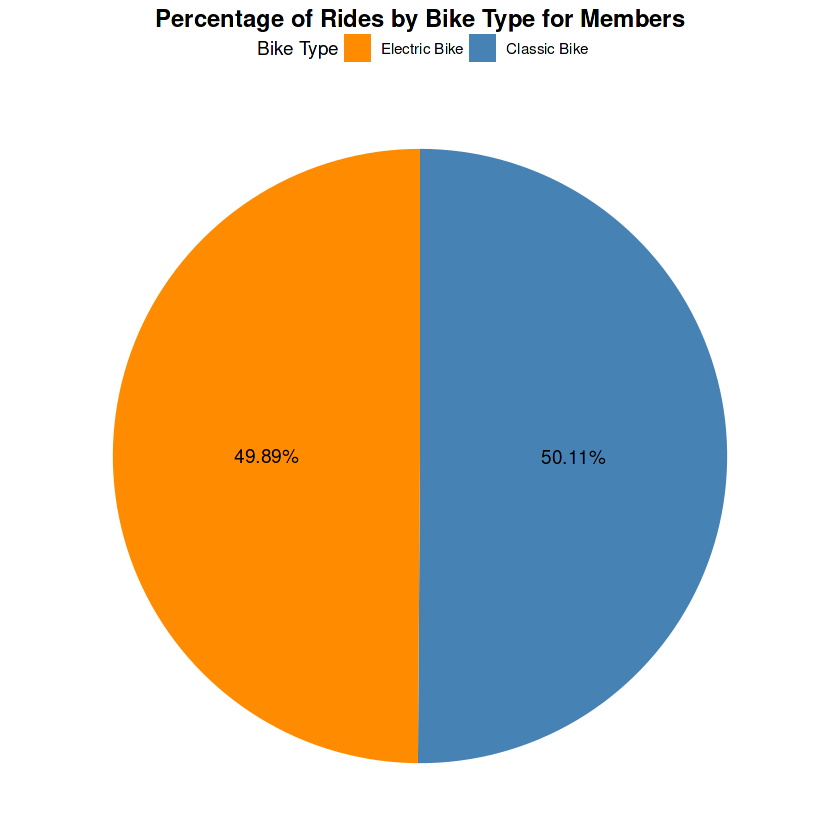

In [33]:
#Type of Bikes Analysis
ride_percentages <- all_trips %>%
  group_by(rideable_type) %>%
  summarise(total_rides = sum(count)) %>%
  mutate(percentage = (total_rides / sum(total_rides)) * 100)

pie_chart <- ggplot(ride_percentages, aes(x = "", y = percentage, fill = factor(rideable_type, levels = c("docked_bike", "electric_bike", "classic_bike")))) +
  geom_bar(stat = "identity", width = 0.8) +
  coord_polar("y", start = 0) +
  scale_fill_manual(values = c("firebrick2", "darkorange", "steelblue"), 
                    labels = c("Docked Bike", "Electric Bike", "Classic Bike")) +
  labs(x = NULL, y = NULL, fill = "Bike Type", 
       title = "Percentage of Rides by Bike Type") +
  geom_text(aes(label = paste0(round(percentage, 2), "%")), 
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(legend.position = "top",
        plot.title = element_text(hjust = 0.5, size = 14, face = "bold"))

print(pie_chart)

#Percentage of Rides by Bike Type for Casual Riders
ride_percentages_casual <- all_trips %>%
  filter(member_casual == "casual") %>%
  group_by(rideable_type) %>%
  summarise(total_rides = sum(count)) %>%
  mutate(percentage = (total_rides / sum(total_rides)) * 100)

pie_chart_casual <- ggplot(ride_percentages_casual, aes(x = "", y = percentage, fill = factor(rideable_type, levels = c("docked_bike", "electric_bike", "classic_bike")))) +
  geom_bar(stat = "identity", width = 0.8) +
  coord_polar("y", start = 0) +
  scale_fill_manual(values = c("firebrick2", "darkorange", "steelblue"), 
                    labels = c("Docked Bike", "Electric Bike", "Classic Bike")) +
  labs(x = NULL, y = NULL, fill = "Bike Type", 
       title = "Percentage of Rides by Bike Type for Casual Riders") +
  geom_text(aes(label = paste0(round(percentage, 2), "%")), 
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(legend.position = "top",
        plot.title = element_text(hjust = 0.5, size = 14, face = "bold"))

print(pie_chart_casual)

#Percentage of Rides by Bike Type for Members
ride_percentages_member <- all_trips %>%
  filter(member_casual == "member") %>%
  group_by(rideable_type) %>%
  summarise(total_rides = sum(count)) %>%
  mutate(percentage = (total_rides / sum(total_rides)) * 100)

pie_chart_member <- ggplot(ride_percentages_member, aes(x = "", y = percentage, fill = factor(rideable_type, levels = c("docked_bike", "electric_bike", "classic_bike")))) +
  geom_bar(stat = "identity", width = 0.8) +
  coord_polar("y", start = 0) +
  scale_fill_manual(values = c("darkorange", "steelblue"), 
                    labels = c("Electric Bike", "Classic Bike")) +
  labs(x = NULL, y = NULL, fill = "Bike Type", 
       title = "Percentage of Rides by Bike Type for Members") +
  geom_text(aes(label = paste0(round(percentage, 2), "%")), 
            position = position_stack(vjust = 0.5)) +
  theme_void() +
  theme(legend.position = "top",
        plot.title = element_text(hjust = 0.5, size = 14, face = "bold"))

print(pie_chart_member)

- Cyclistic customers in general use electric bikes more (51.92%), following classic bikes (45.17%) and they hardly ever (2.92%) use docked bikes.
- Casual customers prefer electric bikes (54.91% of all their rides), but still using docked bikes (7.24%).
- Members prefer classic bikes (50.11% of all their rides), and never use docked bikes.
- Electric bikes are popular among casual riders but members also use them consistently half the time, indicating that Cyclistic's investment in electric bikes is paying off in terms of customer preference and usage.
- The slight preference for classic bikes among members might suggest that they primarily use the bikes for regular commuting or shorter distances where classic bikes are more suitable.

Now, the analysis points out that the percentage of docked bikes is very low for both casual and member customers, which raises the question of whether the classification of "docked bikes" is relevant or if there is a potential issue with the data. Since all the bike types have start and end stations, the concept of "docked bikes" might not accurately represent any significant subset of the bike types. Further investigation or clarification of the data and bike types might be needed to provide a more meaningful analysis of bike preferences. 

However, we can still find some trends for classic and electric bikes by customer type, day of week and month. Since the graphs are big and don't display properly in R, I'll use the Tableau plots I made instead.

- Casual customers prefer electric bikes to classic bikes by a long margin throughout all days of the week and throughout all months of the year except for June, when they use classic bikes slightly more, and May, when they use electric bikes only slightly more than classic bikes.
- Members don't show a strong preference for a type of bike according to day of week, using classic bikes slightly more from Sundays to Tuesdays, electric bikes from Wednesdays to Fridays, and equal preference on Saturdays.
- Members prefer classic bikes over electric bikes from May to August, and in January and February, but the preference is stronger in May and June. On the other hand, members show a strong preference for electric bikes in April and October.

From our type of bike analysis, we can draw important and conclusive insights:
- The popularity of electric bikes among casual and member customers indicates that Cyclistic's investment in these bikes has been successful. This suggests that customers appreciate the convenience and benefits of electric bikes, such as easier pedaling and extended travel range. The positive response to electric bikes can be seen as a positive signal for the company's future investment and expansion in this bike category.
- Casual customers show a consistent preference for electric bikes over classic bikes across all days of the week and months of the year. This indicates that casual riders value the extra assistance and convenience provided by electric bikes, making them a preferred choice for leisure and tourism activities, sports and longer travels. Understanding this preference can guide Cyclistic in promoting electric bikes to its casual customer base and tailoring marketing efforts to highlight the benefits that resonate with this segment.
- Members don't show a strong preference over a type of bike, still using classic bikes slightly more. This suggests that  this customer segment may use bikes primarily for regular commuting or shorter distances, since classic bikes are often favored for short trips or daily routines due to their simplicity and ease of use. Recognizing this pattern can help Cyclistic optimize the availability and distribution of classic bikes, especially in urban areas with higher commuter traffic.

### Final Insights
First, I want to point out one final interesting conclusive insight I came with after all these analyses that is key for Cyclistic to undertand.
It is highly likely that there are two distinct segments of casual riders:
- Local Recreational Users: This segment comprises residents of the Chicago area who use Cyclistic bikes primarily for recreational purposes such as visiting parks, lakes, beaches, and other leisure destinations within the city. They use the bikes during weekends, after work and at night for relaxation, exercise, or enjoying the outdoors. 
- Tourists and Visitors: This segment includes individuals who do not live in the Chicago area but frequently visit the city for leisure activities, tourism and business trips. These casual riders use Cyclistic bikes to explore the city's popular tourist attractions, parks, beaches, museums, and other points of interest. 

Understanding these two segments is crucial for Cyclistic to tailor its marketing and promotional efforts effectively. Differentiating the messaging and benefits based on these two distinct use cases can help Cyclistic maximize the appeal of its annual membership offerings to both types of casual riders.\
The most important segment of casual riders to address is local recreational users, because these are more likely to acquire the annual membership since they live in the Chicago area and can use the bikes more often and for more purposes than habitual tourists and visitors:
- For Local Recreational Users: Cyclistic can tailor its marketing efforts to showcase the cost-effectiveness of an annual membership for both regular recreational rides and day-to-day activities within the Chicago area, so Cyclistic can motivate casual riders to also use their bikes for commuting and everyday transportation routines. By highlighting the convenience of unlimited access to bikes during peak leisure hours and peak traffic hours, Cyclistic can encourage this segment to embrace biking as an integral part of their daily lives.

Finally, we can also make some informed assumptions and provide potential strategies to answer the other two questions:\
Why would casual riders buy Cyclistic annual memberships?
- Casual riders may be encouraged to buy annual memberships if Cyclistic addresses the cost-effectiveness, convenience and benefits like unlimited rides of the membership for both regular recreational rides and day-to-day activities within the Chicago area, so Cyclistic can motivate casual riders to also use their bikes for commuting and everyday transportation routines. They also might want to convert to members if Cyclistic offers attractive benefits such as discounted pricing and exclusive perks for both the membership and with partner businesses and touristic organizations. 
- The analysis showed that casual riders tend to use the bikes for leisure activities, so promoting the convenience and cost-effectiveness of an annual membership for frequent use during their leisure time could be compelling; however, it's also important that Cyclistic addresses the benefits and convenience of using their bikes also for commuting and day-to-day activities, as many casual riders live in the Chicago area and will probably find very advantageous and convenient to use the Cyclistic bikes for their frequent daily routines.

How can Cyclistic use digital media to influence casual riders to become members?
- Cyclistic can leverage digital media to target casual riders with personalized advertising campaigns. Using data from this case study, they can tailor ads to showcase relevant benefits of becoming members, such as cost savings, unlimited rides, discounts and exclusive perks for the membership and with partner businesses and tourism organizations.
- Cyclistic can promote on digital media the use of bikes as an eco-friendly mode of transportation, highlighting the ecological benefits of using Cyclistic bikes in general and the use of their electric bikes.
- Cyclistic can tailor marketing promotions on social media and offers based on seasonal demands. In the summer, Cyclistic needs to mainly address the segment of local recreational casual customers with marketing campaigns that focus on the cost-effectiveness of the annual membership primarily for recreational activities. Cyclistic should offer special discounts, free trial periods and exclusive benefits for memberships in the winter. They should also implement ride challenges with rewards during the winter months to increase usage and engagement.
- Implementing retargeting strategies can remind casual riders of the benefits of an annual membership as they browse online, increasing the chances of conversion.
- Social media platforms can be utilized to showcase positive experiences of current members, testimonials, and engaging content to create a sense of community and encourage casual riders to join.
- Offering limited-time promotions or referral discounts through digital channels can create a sense of urgency and incentivize casual riders to sign up for annual memberships.
- Cyclistic could also collaborate with social media eco-friendly advocates and influencers or local celebrities who are avid bike users to promote the membership program. Their endorsement and positive experiences can influence casual riders to consider the membership.

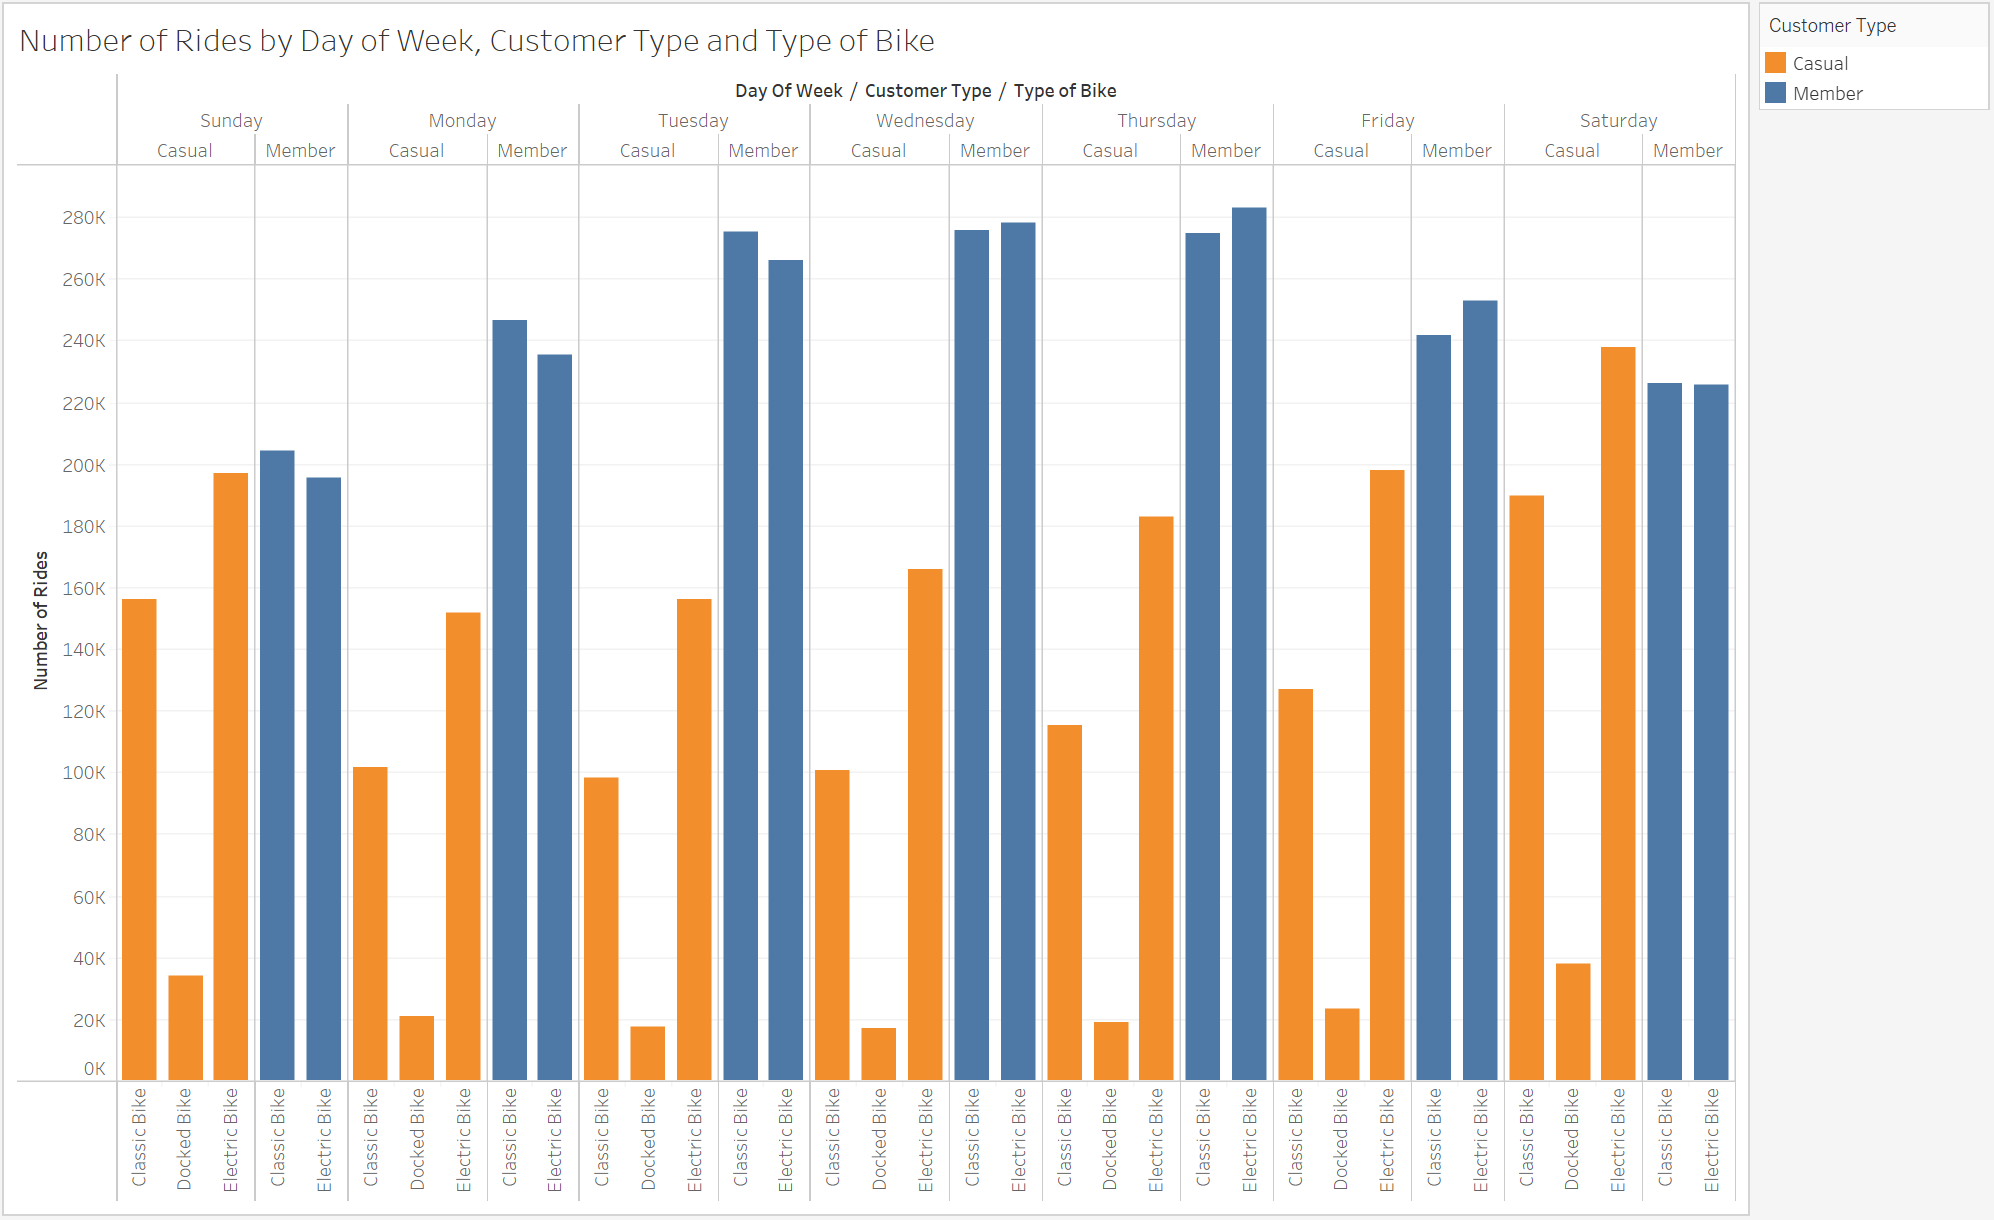
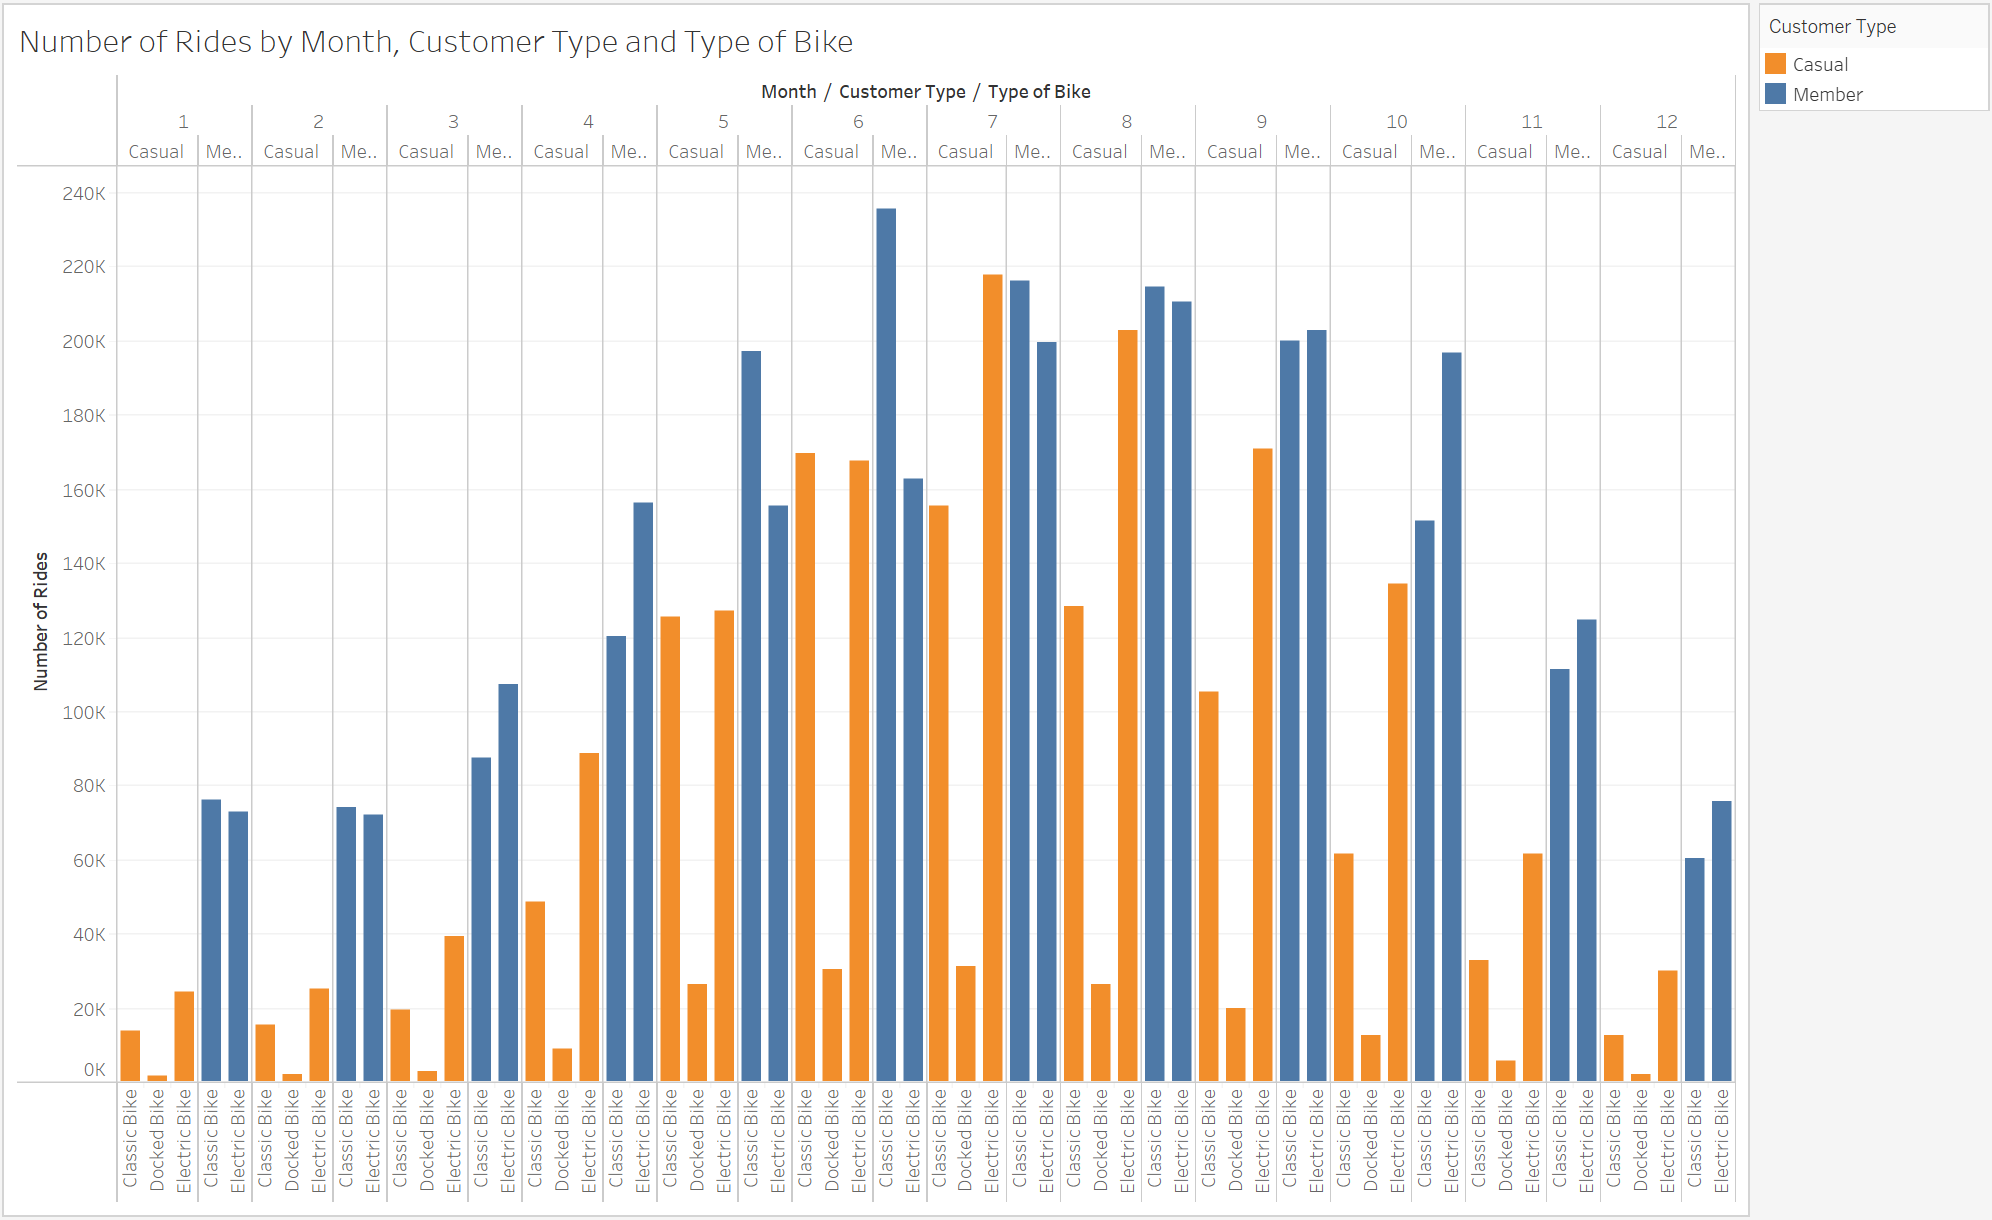

## Summary of the Analysis

The data was formatted with dates yyyy-mm-dd, days of week in string format, months in number format and ride length in seconds. The data was filtered to rides where bikes were not part of Quality Control or the ride length was less than 10 seconds.\
The data was organized by type of customer, day of week, month and type of bike. The 12 monthly data tables were united or bounded to form a single data frame with data containing a full year. When analyzing days of the week, the data table was organized with the days numbered from Sunday=1 to Saturday=7, sorted in ascending order. When analyzing months, the data was also sorted from January=1 to December=12, in ascending order. When analyzing hours of the day, the data was sorted from midnight=0 to 11PM=23, using the 24-hour clock.

Insights and trends that were discovered from the analysis:
- Members take more rides overall compared to casual members, with the exception of Saturdays.
- Members take much more rides than casual customers on weekdays, but the number of rides stabilizes on weekends, indicating a shift towards more leisure-oriented usage.
- Casual riders exhibit a higher preference for weekend bike rides, indicating that they utilize the service more for recreational activities.
- Members demonstrate higher ride frequency on weekdays, implying that they are more likely to use the bikes for consistent transportation needs throughout the workweek.
- The average ride length for casual customers is much longer than members for all days of the week, indicating that casual riders are more inclined towards longer leisurely activities, while members use the bikes for commuting and day-to-day activities.
- Rides are longer for both types of customers on the weekends, indicating that weekends provide an opportunity for leisure and touristic activities for all users.
- Users occasionally participate in extended recreational activities that span across long weekends, including both Fridays and Mondays.
- Both types of customers take many more bike rides in the summer and fewer in the winter.
- Casual customers take much longer rides, with their average duration being more than double that of members in every month of the year.
- Casual customers also take longer rides in the summer, from May through August, while for members this trend is also present but much less prominent. 
- Both types of customers take shorter rides in the winter, but it’s less noticeable for members.
- On weekdays, the peak hours for members are from 15:00 to 19:00, with the highest traffic observed at 17:00, and they also exhibit a trend of increased bike rides in the morning hours, suggesting that members may use the bikes to commute and other day-to-day activities.
- On weekends, there is a noticeable shift in the number of rides, with a concentration between 12:00 and 17:00 and a peak at 15:00 for both customer types. This indicates a shift in usage patterns for recreational activities.
- Casual customers have longer average ride lengths during early morning hours all days (2:00 to 6:00), potentially indicating longer rides for late-night leisure activities. Members, on the other hand, exhibit more consistent ride lengths throughout the day, suggesting more consistent usage patterns.
- The most common stations and routes for members are inside the urban areas where there are corporate buildings, residential zones and universities.
- The most common stations and routes for casual riders involve parks, lakes, aquariums, touristic places and stations near the beach.
- Electric bikes are very popular among casual riders, and members don't exhibit a strong preference for a specific type of bike.
- Finally, it’s highly likely that there are two distinct segments of casual riders; local recreational users, who are residents of the Chicago area who use Cyclistic bikes primarily for recreational purposes, and tourists, who don’t live in the Chicago area but frequently visit the city for leisure activities.

These insights help to answer the business question by providing ways in which both types of customers use Cyclistic bikes differently, because it helps us compare how many rides and how long those rides last for members and casual customers by hour of the day, day of the week, month, season, and geographic location.\
This way, important insights were discovered by analyzing trends in weekdays and weekends for both types of customers to find out the reasons why they make use of the Cyclistic bikes. The insights found of members taking more rides on weekdays but shorter ones helped come to the conclusion that members use Cyclistic rides mainly for commuting and day-to-day travels while casual users use them mainly for leisure.

### Presentation and Dashboard

Cyclistic Data Analytics Case Study Tableau Dashboard:\
https://public.tableau.com/views/DataAnalyticsCaseStudy-Cyclistic/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

Cyclistic’s Customer Type Differences on Bikes Use Presentation:\
https://docs.google.com/presentation/d/e/2PACX-1vRp1bEIxu6NgLV7HnVMq0V-5Z7AK5sS8FEqJrSPNbBPED3KihHzcT0Hn1lSJ5i8Cw/pub?start=false&loop=false&delayms=3000

Jaime A. Velasquez's Portfolio - GitHub Repository:\
https://github.com/jaimeandrevelasquez/jaimeandrevelasquez.github.io

# *Act Phase*

### **Conclusions**

- Members rely more and are more engaged with the Cyclistic bike-share service.
- On weekdays, members take more rides but their travels are much shorter.
- Members use the bikes for commuting and daily routines on weekdays. 
- On weekends, both types of customers take the same number of rides but casual customers take much longer rides.
- On weekends, members use the bikes both for routine activities and for leisure.
- **Casual customers use bikes mainly for leisure, while members use them mainly for commuting and day-to-day travels.**
- Overall, members take more rides, whereas casual customers take longer rides. 
- Overall, people take more rides in the summer and fewer in the winter.
- In the summer, casual customers also take longer rides, while members’ travel length remain steadier.
- On weekdays, there’s a high demand for Cyclistic bikes in the afternoon and evening hours; on weekends, the peak demand occurs throughout daylight hours.
- Casual customers take longer rides when they engage in morning and late-night leisure activities, while members show steadier patterns throughout the day.
- Casual customers frequent stations near the coast, close to parks, beaches, aquariums, lakes and other touristic places like museums.
- Members frequent stations in urban areas with corporate buildings, universities and residential zones.
- Casual customers show a strong preference for electric bikes, valuing their convenience for leisure and tourism activities.
- There are two segments of casual customers: local recreational casual users, and tourists who don’t live in the Chicago area. (Cyclistic should focus on the most important segment of local recreational casual customers and motivate them to also use the bikes for everyday activities.) 


### **Recommendations**

1. **Focus on the segment of local recreational casual customers with marketing campaigns:** 
   Cyclistic needs to mainly address the segment of local recreational casual customers with marketing campaigns that focus on the cost-effectiveness of the annual membership for both recreational and everyday activities, highlighting the eco-friendly benefits too. This should be done mainly in the summer, when there’s a peak in casual riders, and with outdoor advertising near the most popular stations.

2. **Adjust Cyclistic pricing plans’ limits:**
   Cyclistic should increase the price of single-ride and full-day passes, adjust the limits and restrictions for their pricing plans, and implement overcharging measures for rides that exceed the maximum allowed time to encourage casual members to convert into annual members. 
   
3. **Address casual customers with special marketing campaigns during the winter:**
   Cyclistic should offer special discounts, free trial periods and exclusive benefits for memberships in the winter. They should also implement ride challenges with rewards during the winter months to increase usage and engagement. Cyclistic should also develop seasonal campaigns that highlight the advantages of using Cyclistic bikes during the winter. 

4. **Consider how Cyclistic can optimize docking station practices for electric bikes during the summer:**
   Cyclistic should optimize docking station practices during the peak summer season for electric bikes, taking into account the most frequented stations during this period as the Cyclistic demand for electric bikes is very high and might lead to bike deficit. 
   
5. **Partnerships and collaborations with local businesses and tourism organizations:**
   Cyclistic should partner with different local businesses and tourism organizations in the Chicago area like shops, restaurants, grocery stores, museums and aquariums to offer exclusive perks, packages and discounts to members and those who convert to members, who use the bikes for day-to-day activities and for leisure, since this is an eco-friendlier mode of transportation. 
   
6. **High digital media engagement:**
   Cyclistic should leverage digital media for personalized advertising campaigns targeting casual riders based on the season. These campaigns should highlight the cost-effectiveness and benefits of becoming members, such as discounts, exclusive perks, and eco-friendly properties. Additionally, showcasing positive experiences and testimonials from satisfied members can be beneficial. Collaborating with avid bike users and influencers who endorse Cyclistic will further strengthen the campaign.
   
   
### Further Exploration:

- Track the bike usage patterns of Cyclistic users over an extended period to assess sustained engagement and usage modifications for both types of customers, and identify opportunities for membership retention and conversion.
- Conduct surveys to collect feedback from casual customers who have converted to members to understand their motivations for the conversion and identify areas for improvement in the membership program; general user surveys and feedback can also help understand their experiences and satisfaction with Cyclistic bikes and stations.

